In [569]:
import pandas as pd 
import numpy as np 
#from scikit

# Some visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns

## Some other snippit of codes to get the setting right 
## This is so that the chart created by matplotlib can be shown in the jupyter notebook. 
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' ## This is preferable for retina display. 
import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning
import os ## imporing os

In [570]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [571]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [572]:
missing_percentage(train)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


In [573]:
## saving passenger id in advance in order to submit later. 
passengerid = test.PassengerId

print (train.info())
print ("*"*40)
print (test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pass

In [574]:
def missing_percentage(df):
    total= df.isnull().sum().sort_values(ascending=False)
    percent= round(total/len(df)*100,2)
    return pd.concat([total,percent], axis=1, keys=['Total','Percent'])

In [575]:
%timeit -r2 -n15 missing_percentage(train)

1.71 ms ± 122 µs per loop (mean ± std. dev. of 2 runs, 15 loops each)


In [576]:
missing_percentage(train)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


In [577]:
%timeit -r2 -n15 missing_percentage(test)
missing_percentage(test)

1.56 ms ± 16.1 µs per loop (mean ± std. dev. of 2 runs, 15 loops each)


,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
PassengerId,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00


In [578]:
def percent_value_counts(df, feature):
    percent= pd.DataFrame(round((df.loc[:,feature].value_counts(dropna=False,normalize=True))*100,2))
    total= pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    
    total.columns= ['Total']
    percent.columns= ['Percent']
    
    return pd.concat([total,percent],axis=1)

In [579]:
percent_value_counts(train,'Embarked')

,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


In [580]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Text(0.5, 1.0, 'Test Set')

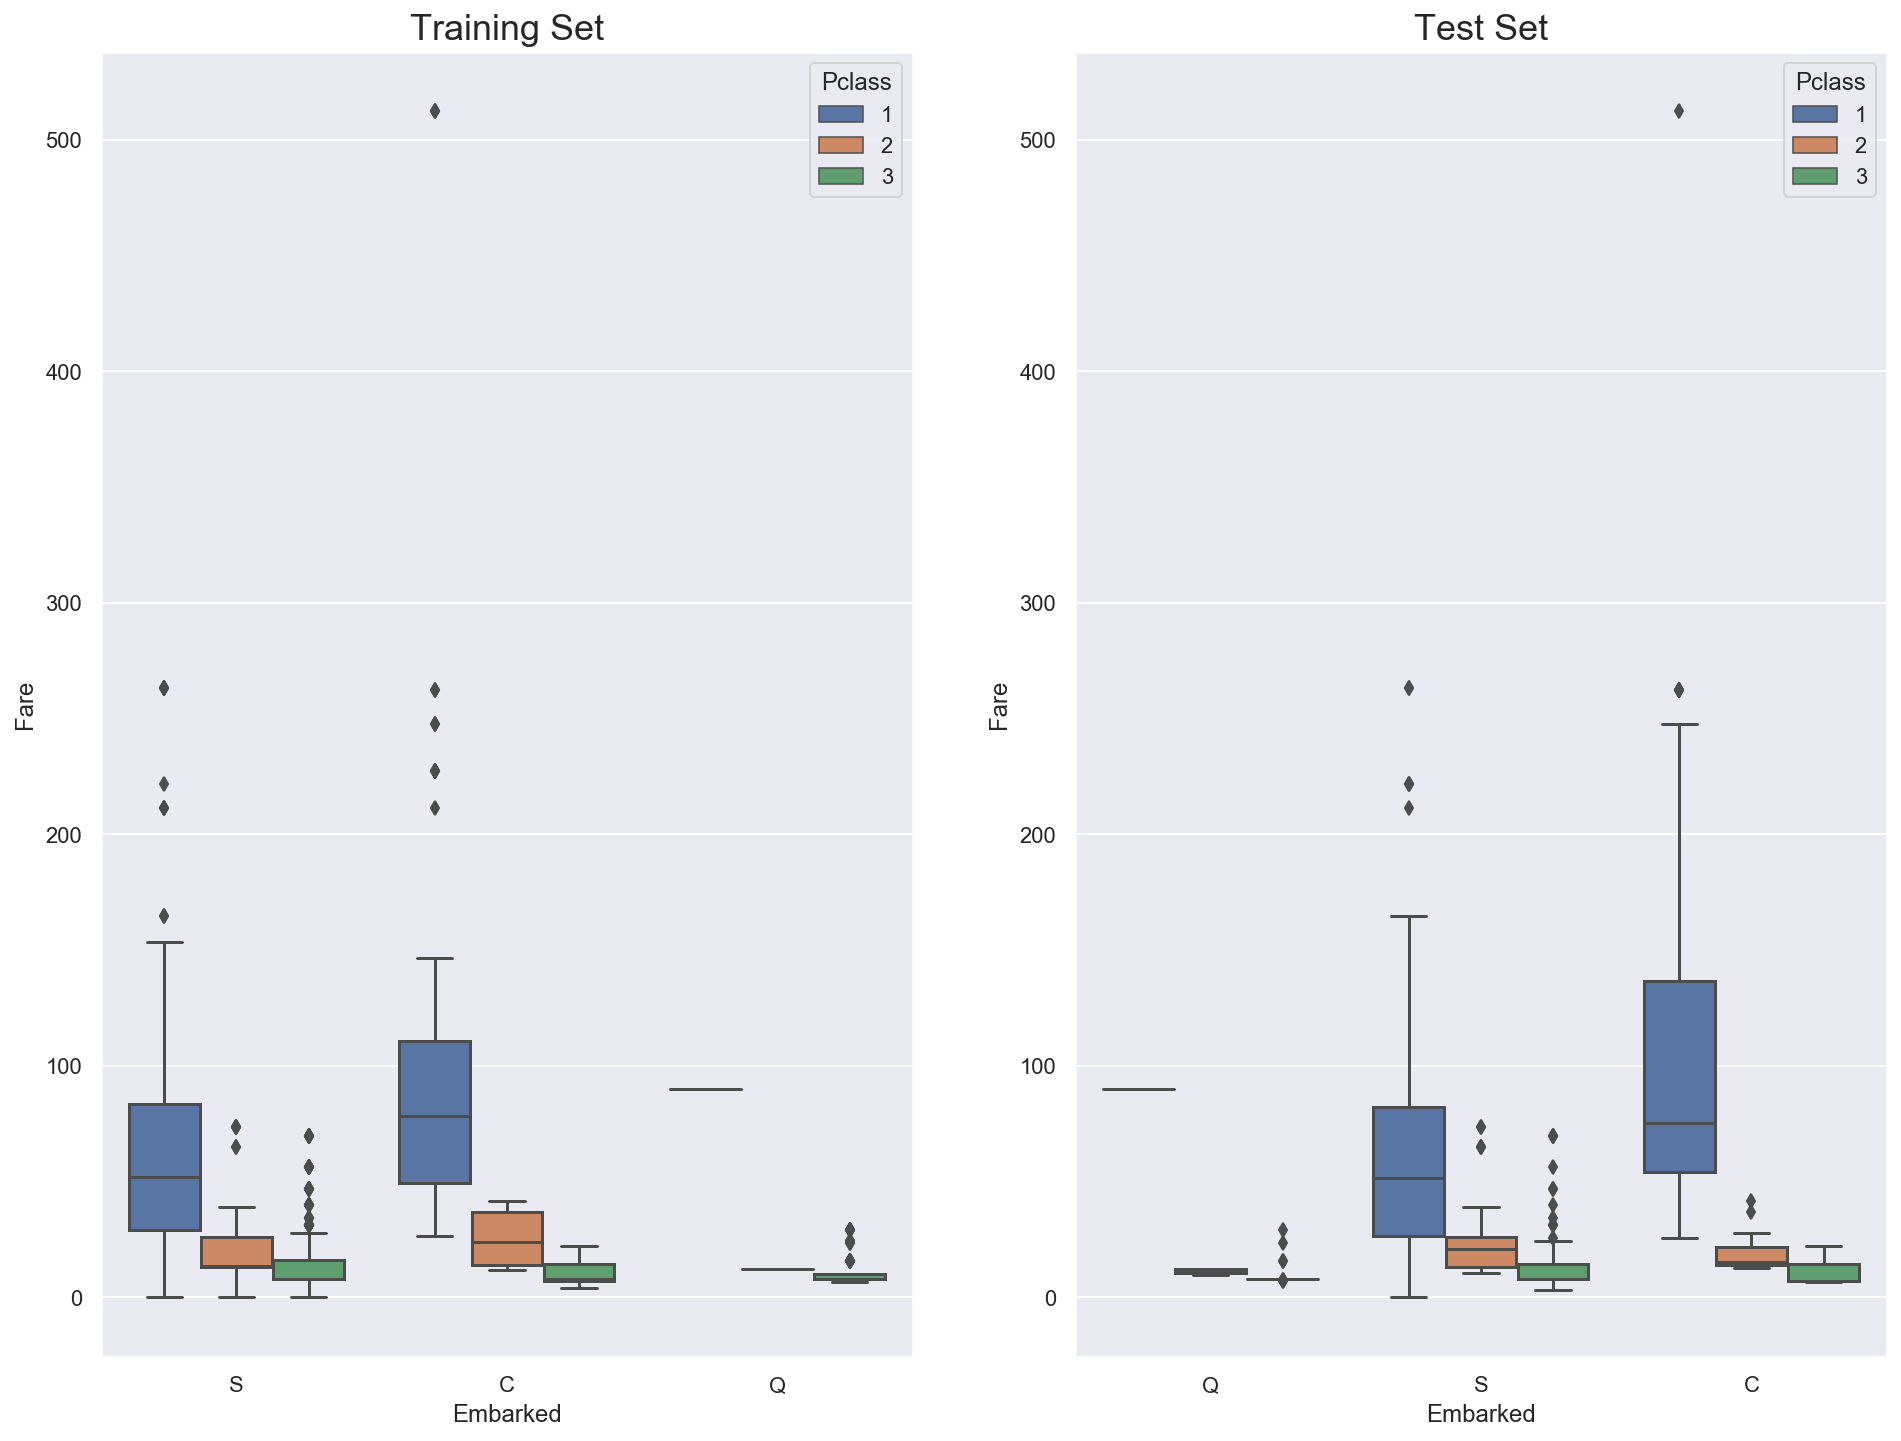

In [581]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

fig,ax= plt.subplots(figsize=(16,12), ncols=2)

ax1= sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=train, ax=ax[0])
ax2= sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=test, ax=ax[1])

ax1.set_title("Training Set", fontsize=18)
ax2.set_title("Test Set", fontsize=18)

In [582]:
## Replacing the null values in the Embarked column with the mode.
train.Embarked.fillna("C",inplace=True)

In [583]:
#concating all the train and test data into a single variable 
#dropping survivors to match dimension

survivors=train.Survived
train.drop(['Survived'],axis=1,inplace=True)
all_data= pd.concat([train,test],ignore_index=False)
all_data.Cabin.fillna("N", inplace=True)


In [584]:
all_data.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
710,711,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C
652,653,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,N,S
106,107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,N,S
850,851,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,N,S
703,704,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,N,Q
71,963,3,"Minkoff, Mr. Lazar",male,21.0,0,0,349211,7.8958,N,S
21,913,3,"Olsen, Master. Artur Karl",male,9.0,0,1,C 17368,3.1708,N,S
618,619,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S
292,293,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.8750,D,C
52,53,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


In [585]:
all_data.Cabin = [i[0] for i in all_data.Cabin]

In [586]:
percent_value_counts(all_data,'Cabin')

,Total,Percent
N,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


In [587]:
#calculating mean fare of each cabin
all_data.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [588]:
def cabin_estimator(i):
    """grouping cabin feature by the first letter"""
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>=47 and i<53:
        a = "D"
    elif i>=53 and i<54:
        a = "E"
    elif i>=54 and i<116:
        a = "C"
    else:
        a= "B"
    return a     
            

In [589]:
with_N= all_data[all_data.Cabin == "N"]

without_N= all_data[all_data.Cabin != "N"]

In [590]:
with_N.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
64,65,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,N,C
828,829,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,N,Q
392,393,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.9250,N,S
292,1184,3,"Nasr, Mr. Mustafa",male,NaN,0,0,2652,7.2292,N,C
273,1165,3,"Lennon, Miss. Mary",female,NaN,1,0,370371,15.5000,N,Q
529,530,2,"Hocking, Mr. Richard George",male,23.0,2,1,29104,11.5000,N,S
747,748,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,N,S
368,369,3,"Jermyn, Miss. Annie",female,NaN,0,0,14313,7.7500,N,Q
42,43,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,N,C
115,116,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,STON/O 2. 3101294,7.9250,N,S


In [591]:
#applying cabin estimator function
with_N["Cabin"] = with_N.Fare.apply(lambda x : cabin_estimator(x))

#getting back training data
all_data= pd.concat([with_N, without_N], axis=0)

#sort using passengerid
all_data.sort_values(by="PassengerId",inplace= True)

#passengerid helps separate train and test data
train = all_data[:891]
test = all_data[891:]

train["Survived"]=survivors

In [592]:
print (test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB
None


In [593]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB
None


In [594]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


In [595]:
missing_value = test[(test.Pclass==3) & (test.Embarked=="S") & (test.Sex=="male")].Fare.mean()

test.Fare.fillna(missing_value, inplace=True)

In [596]:
missing_percentage(train)

,Total,Percent
Age,177,19.87
PassengerId,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00
Cabin,0,0.00


In [597]:
missing_percentage(test)

,Total,Percent
Age,86,20.57
PassengerId,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00
Cabin,0,0.00


Text(0.5, 0, 'Sex')

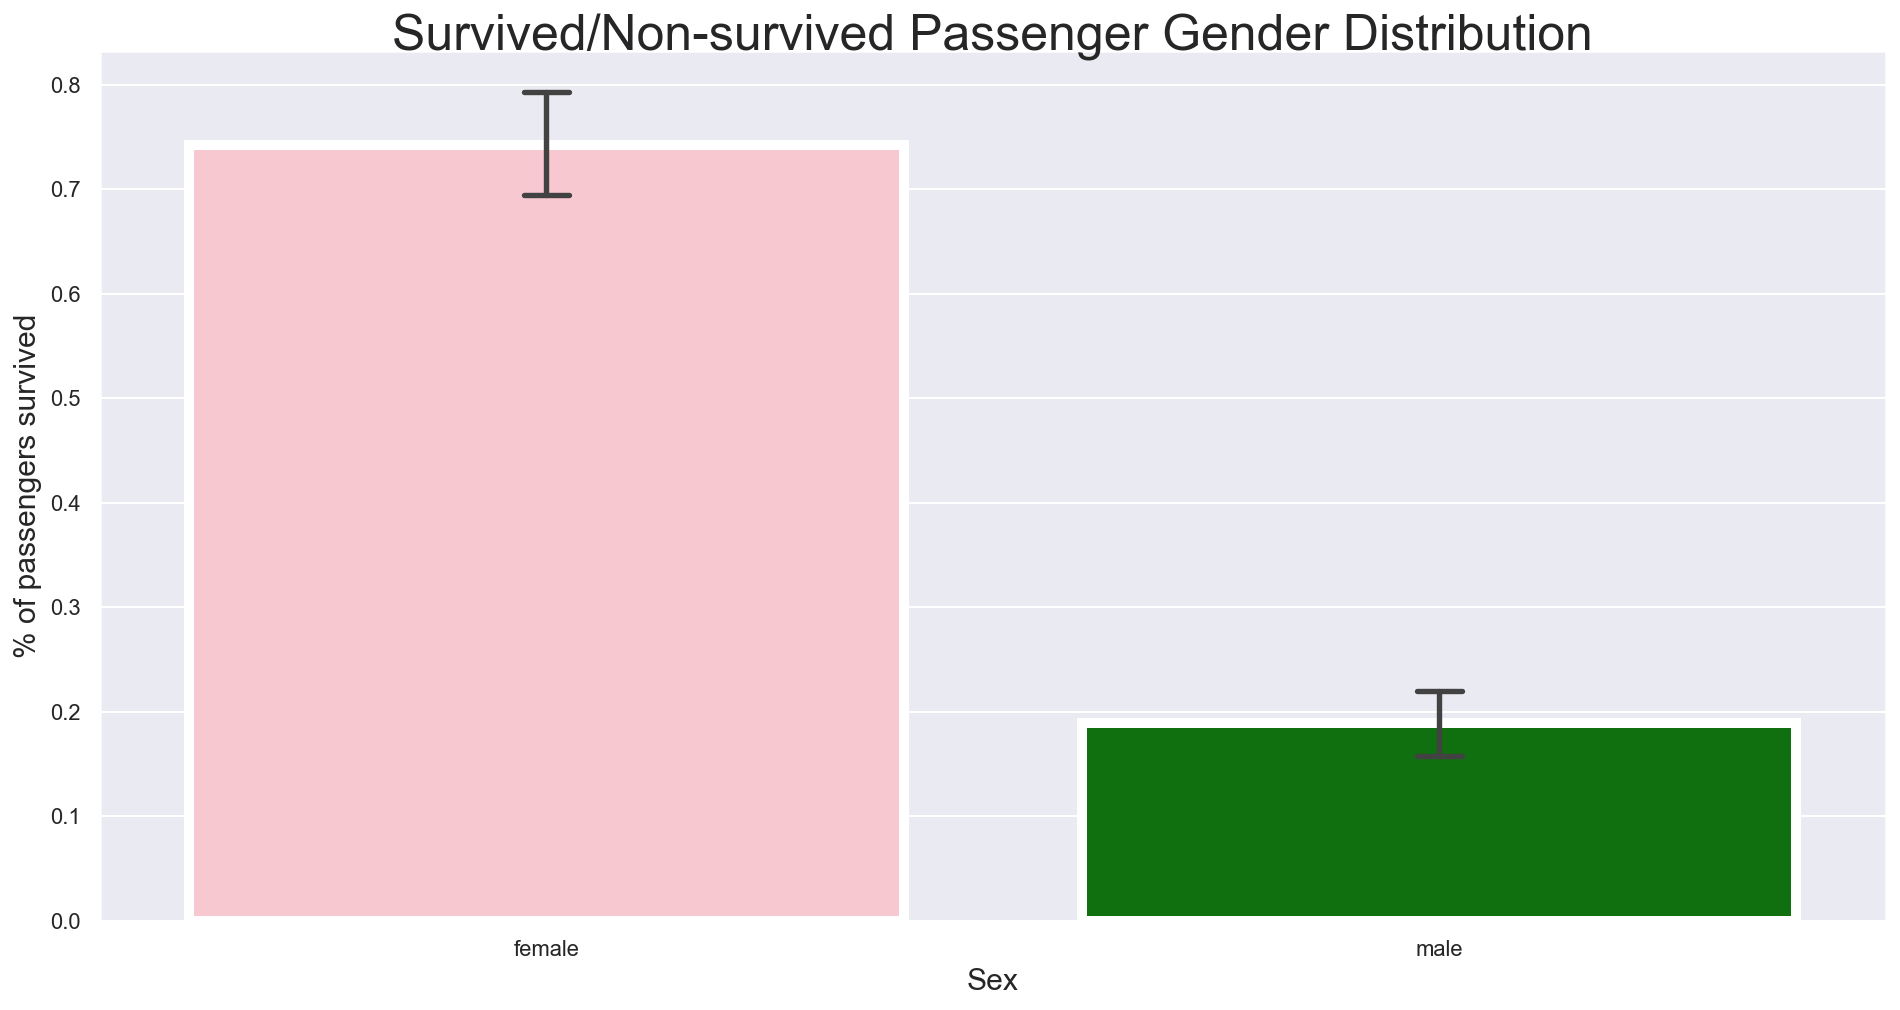

In [598]:
import seaborn as sns
pal= {'male':"Green", 'female':"Pink"}
sns.set(style="darkgrid")
plt.subplots(figsize=[16,8])
ax = sns.barplot(x = "Sex",
                 y = "Survived",
                 data = train,
                 palette = pal,
                 linewidth = 5,
                 order = ["female", "male"],
                 capsize = 0.05
                )

plt.title("Survived/Non-survived Passenger Gender Distribution", fontsize=25, loc='center', pad= 0)
plt.ylabel("% of passengers survived", fontsize=15)
plt.xlabel('Sex', fontsize=15)

                 


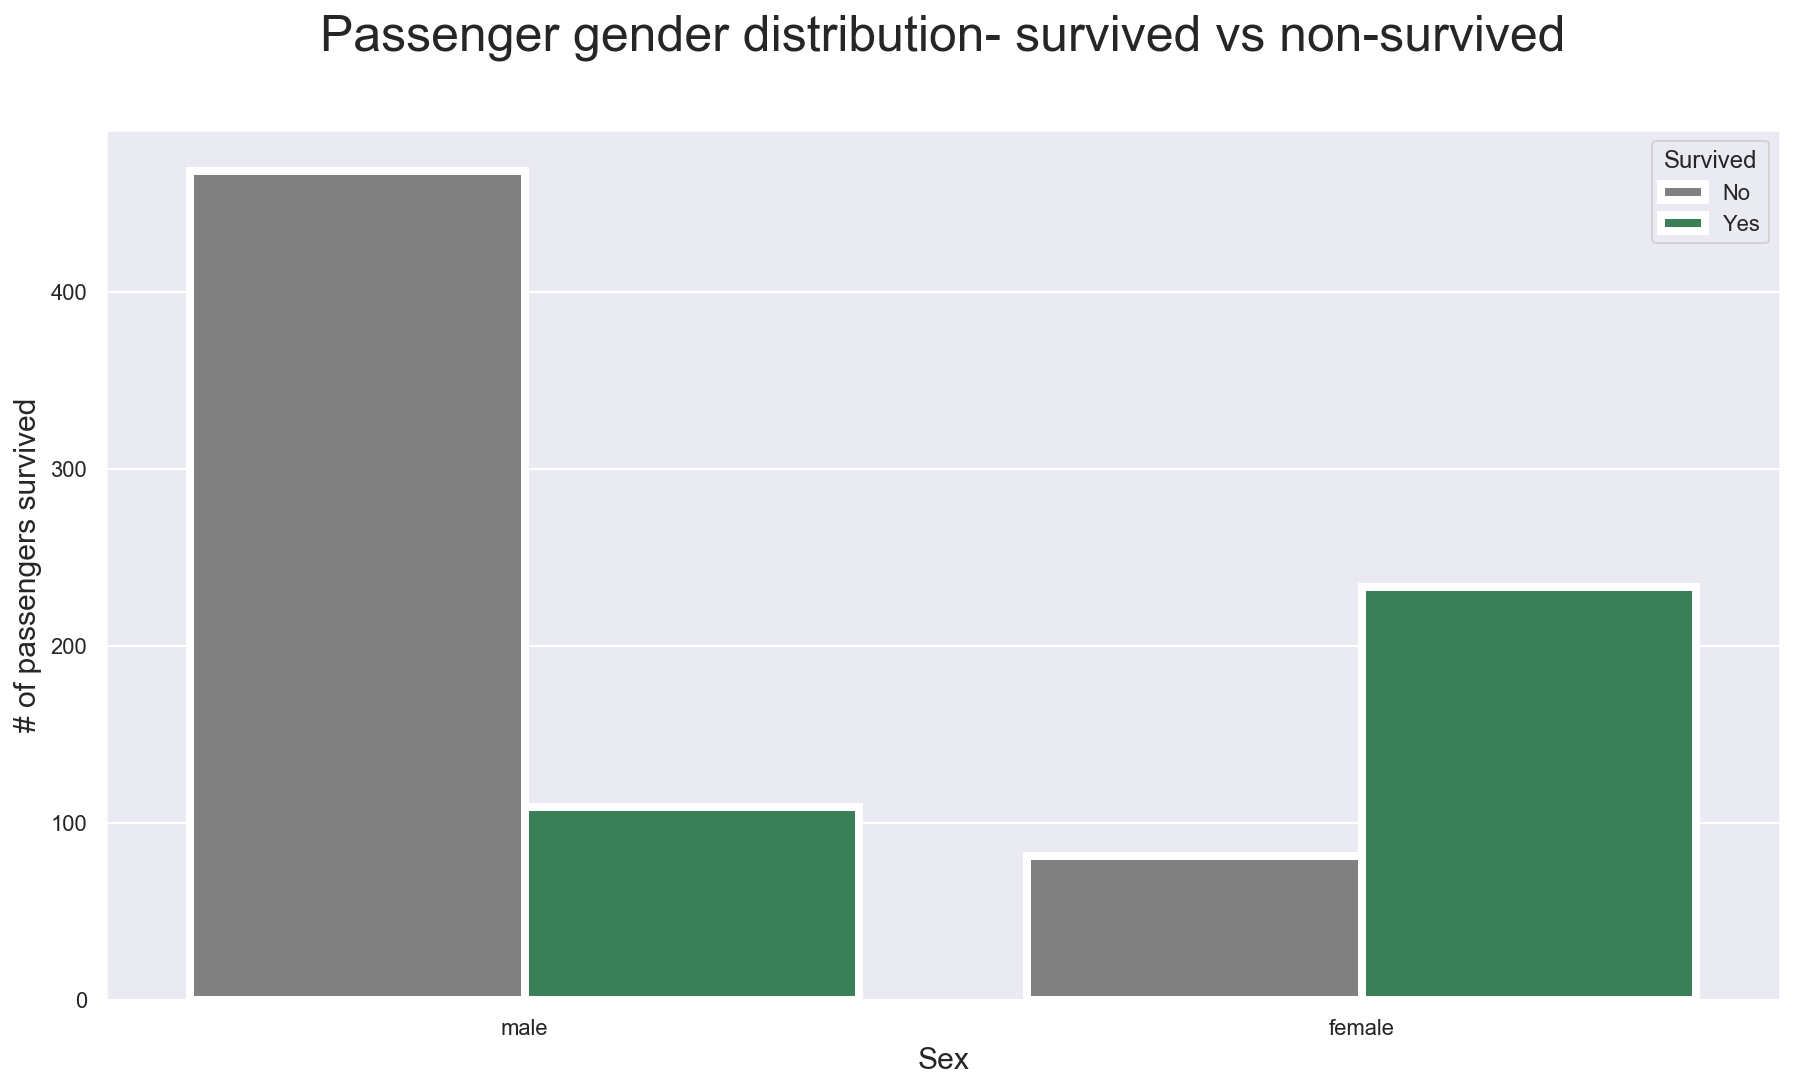

In [599]:
pal = {1:"seagreen", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize= (15,8))
ax = sns.countplot(x="Sex", hue="Survived", data=train, linewidth=4, palette=pal)

#fixing x-label y-label and title

plt.title("Passenger gender distribution- survived vs non-survived", fontsize=25, pad=40)
plt.ylabel("# of passengers survived", fontsize=15)
plt.xlabel("Sex", fontsize=15)

#fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
         No  Yes
Pclass          
1        80  136
2        97   87
3       372  119
[216, 184, 491]
[37.03703703703704, 52.71739130434783, 75.76374745417516]


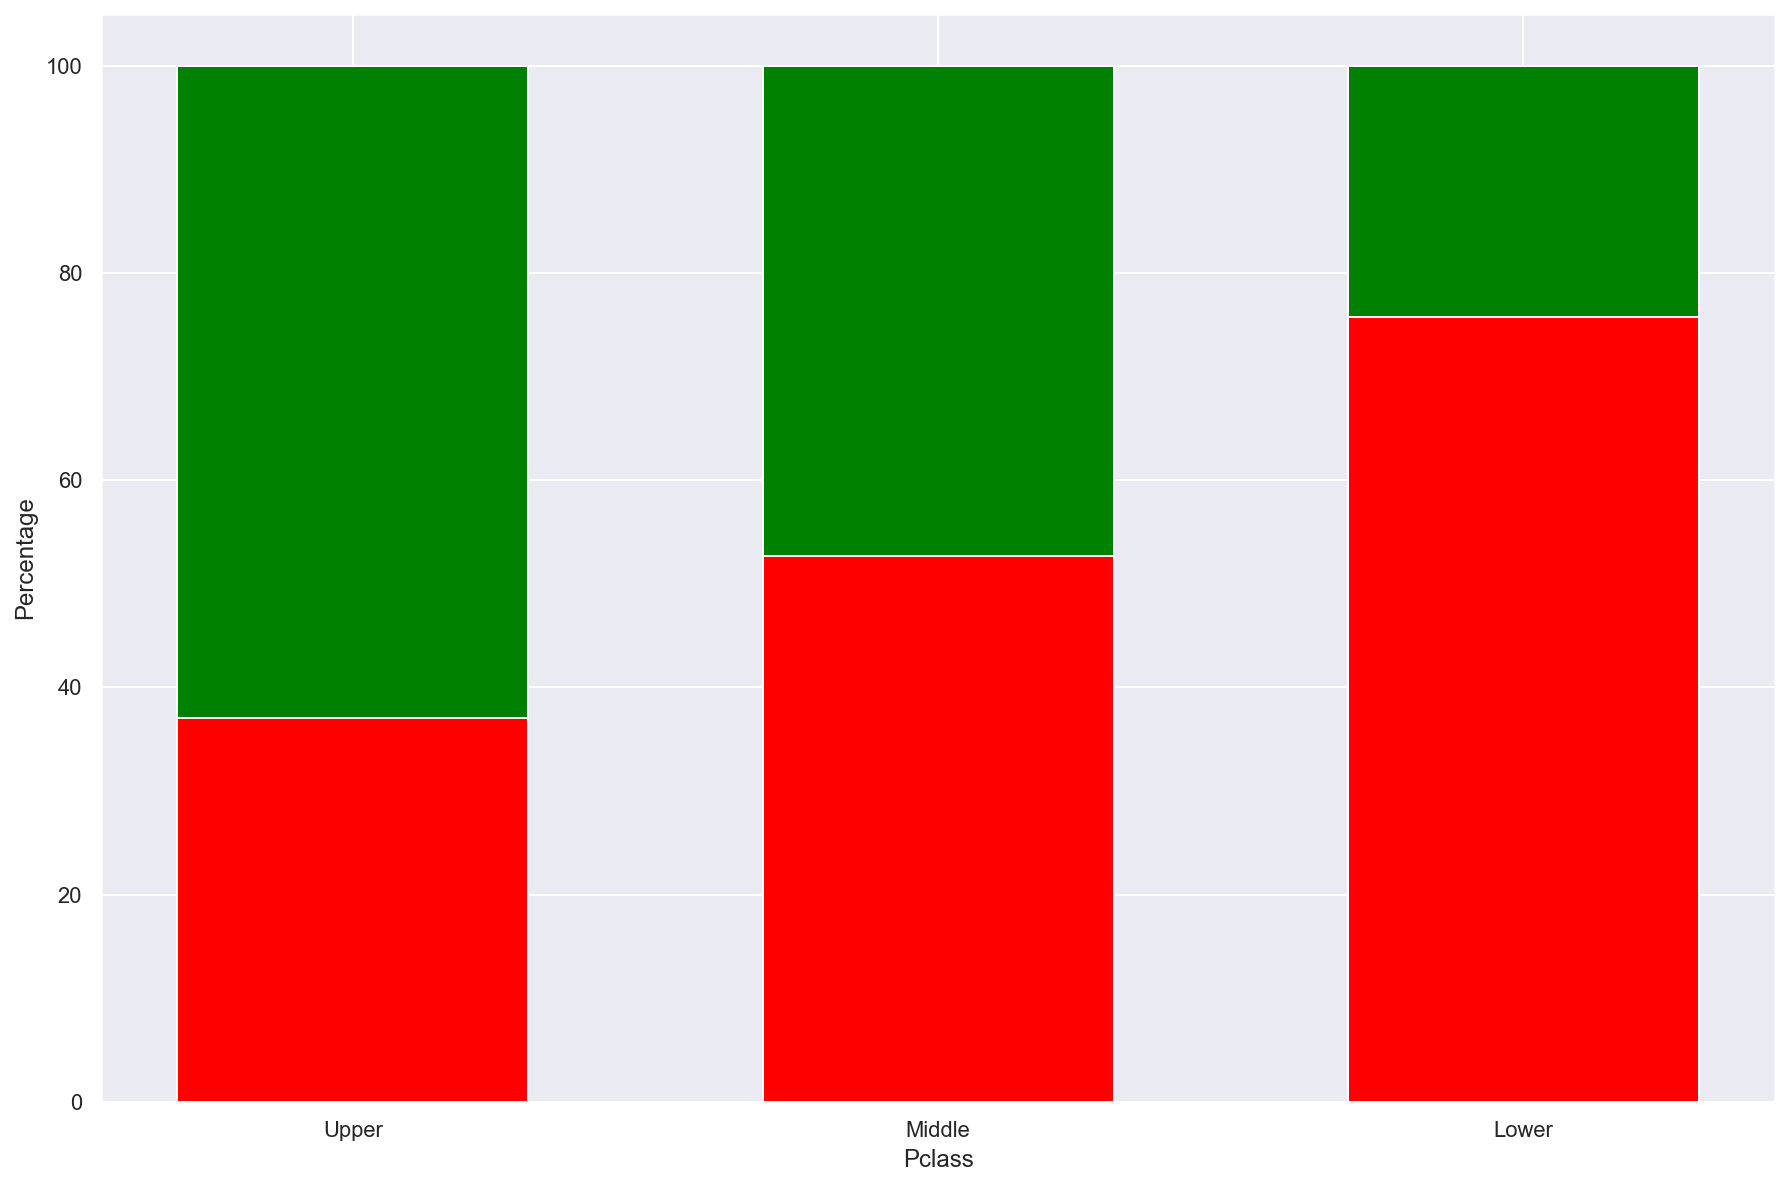

In [600]:
temp= train[['Pclass','Survived','PassengerId']].groupby(['Pclass','Survived']).count().reset_index()
temp_df= pd.pivot_table(temp, values='PassengerId', index='Pclass', columns='Survived')
print(temp_df)
names= ["No","Yes"]
temp_df.columns= names
print(temp_df)
r=[0,1,2]
totals = [i+j for i,j in zip(temp_df['No'], temp_df['Yes'])]
print(totals)
No_s = [i/j*100 for i,j in zip(temp_df['No'], totals)]
Yes_s = [i/j*100 for i,j in zip(temp_df['Yes'], totals)]
print(No_s)

#plotting
plt.subplots(figsize=(15,10))
barWidth = 0.6
names = ("Upper","Middle","Lower")

#create red bars
plt.bar(r, No_s, color='Red', edgecolor='white', width=barWidth)
#create green bars
plt.bar(r, Yes_s, bottom= No_s, color='Green', edgecolor='white', width=barWidth)

#custom x axis
plt.xticks(r, names)
plt.xlabel("Pclass")
plt.ylabel('Percentage')

#show graphic
plt.show()



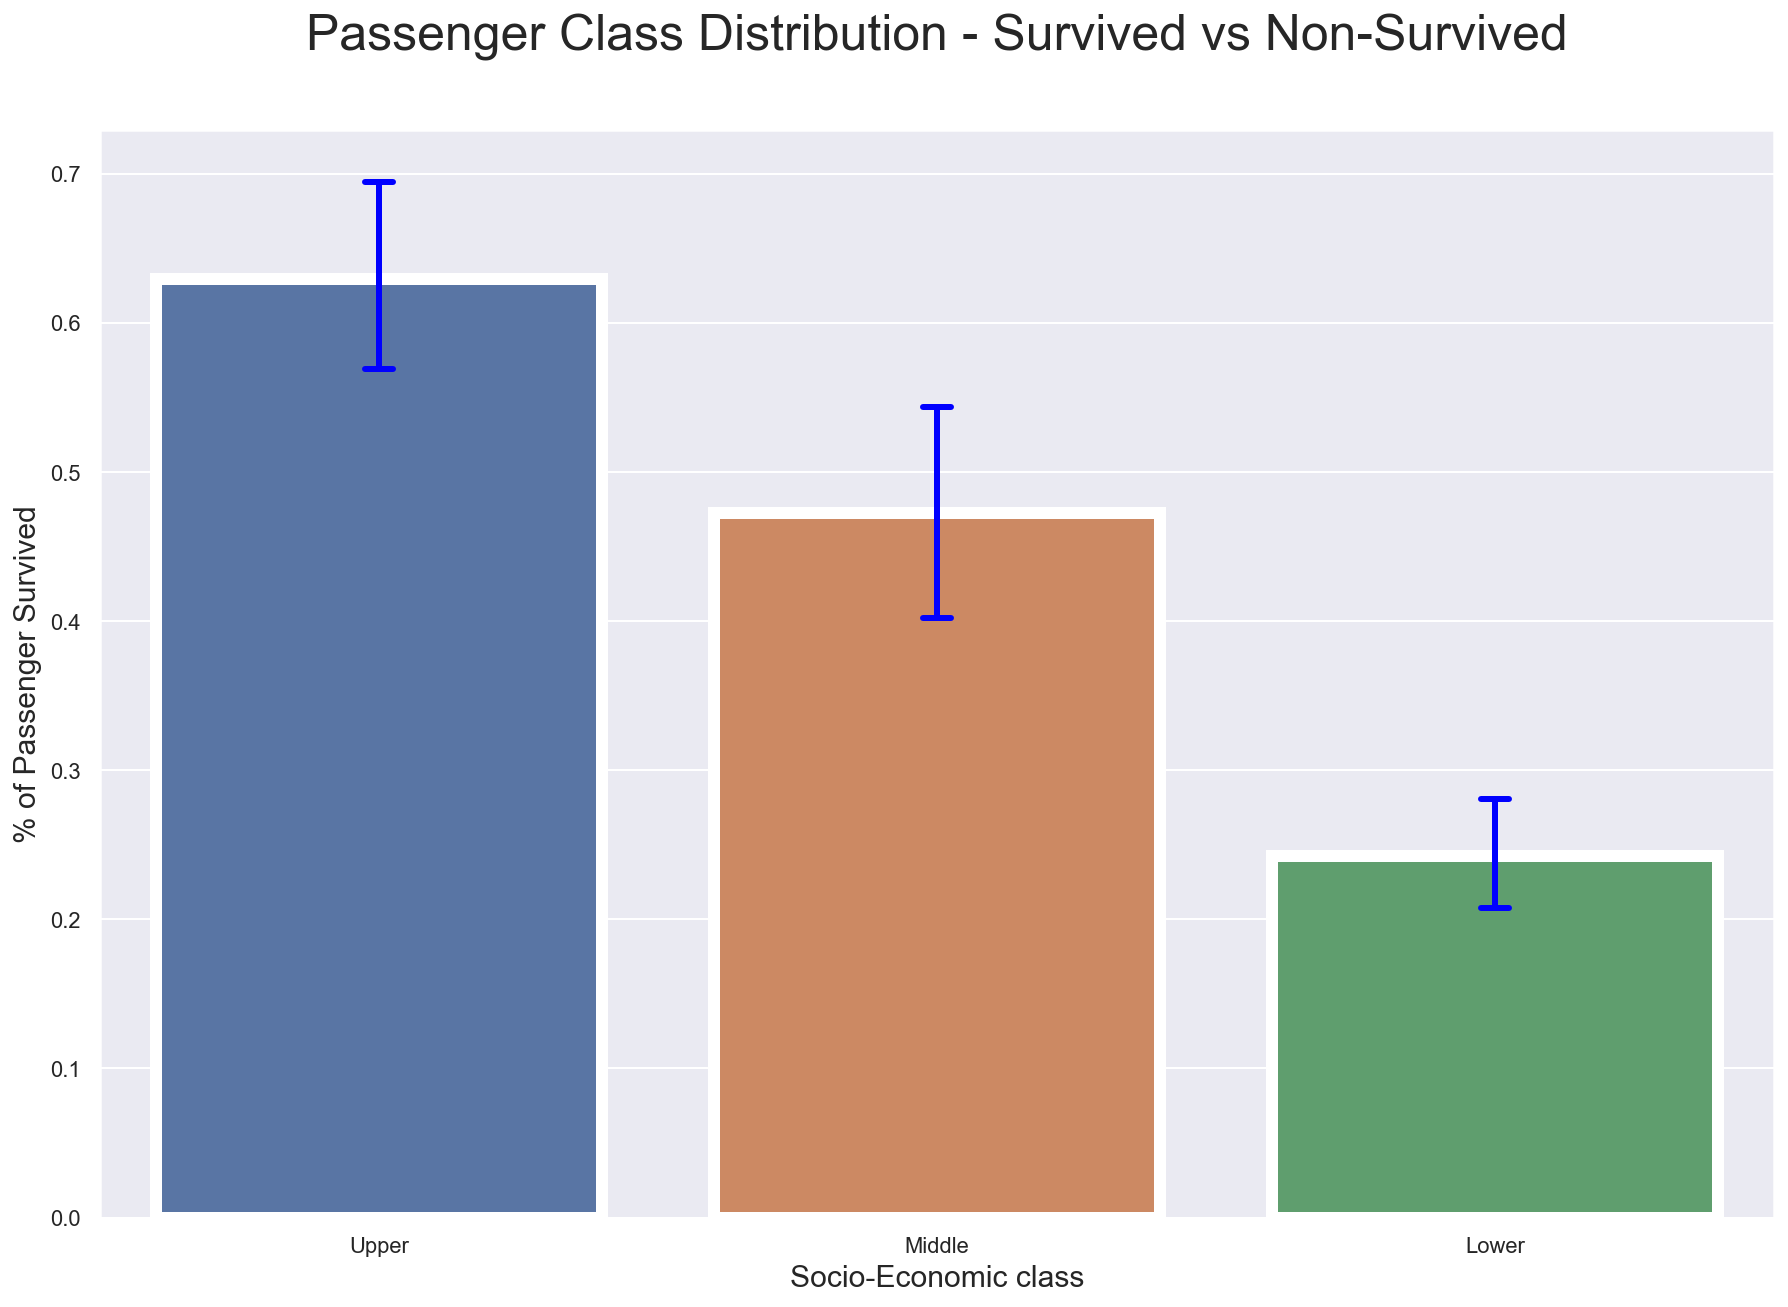

In [601]:
plt.subplots(figsize=(15,10))
sns.barplot(x="Pclass", y="Survived", data=train, linewidth=6, capsize=.05, errcolor='blue', errwidth=3)

plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25, pad=40)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);
names = ['Upper', 'Middle', 'Lower']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, names);


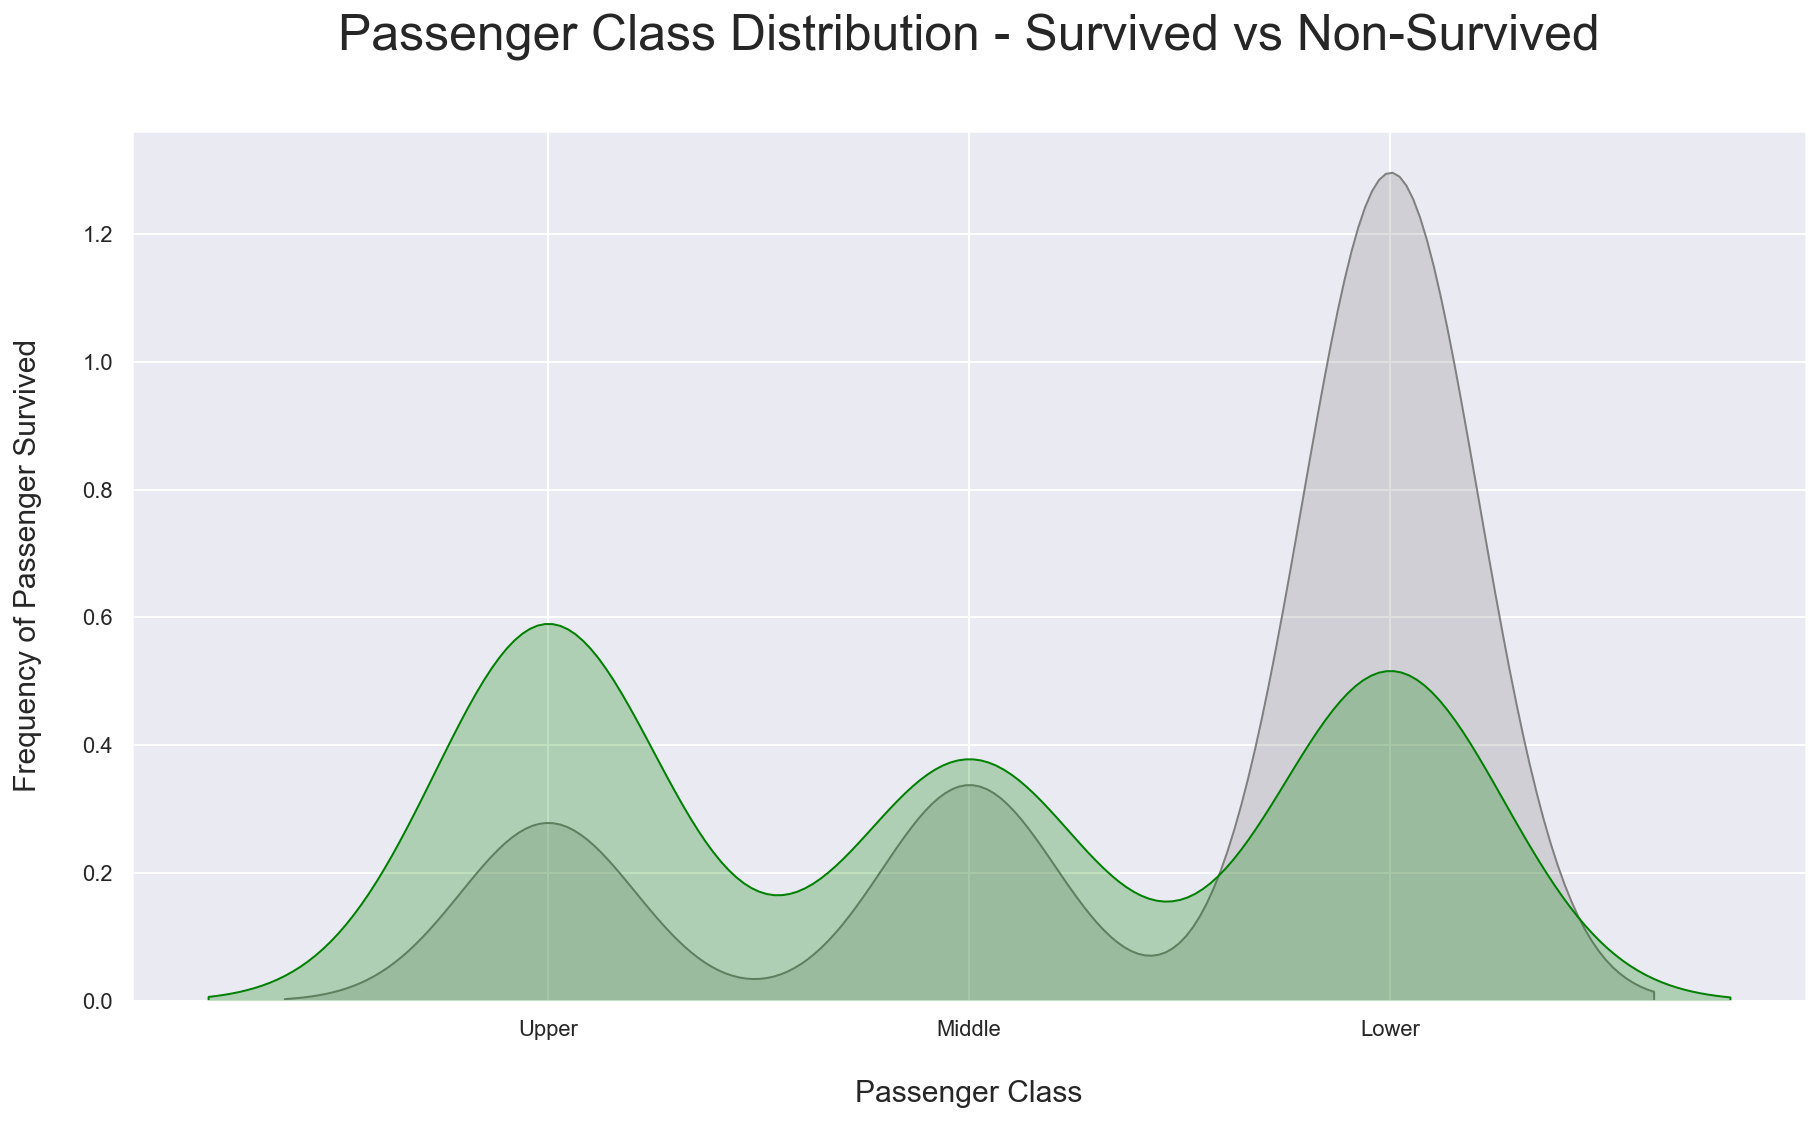

In [602]:
fig = plt.figure(figsize=(15,8))
ax= sns.kdeplot(train.Pclass[train.Survived==0], 
                color='gray',
                shade=True,
                label='not survived'
               )

ax= sns.kdeplot(train.Pclass[train.Survived==1],
               color='green',
               shade=True,
               label='survived'
               )

plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Passenger Class", fontsize = 15,labelpad =20)
#converting xticks to labels for better understanding
labels=['Upper','Middle','Lower']
plt.xticks(sorted(train.Pclass.unique()),labels);


Text(0.5, 0, 'Fare')

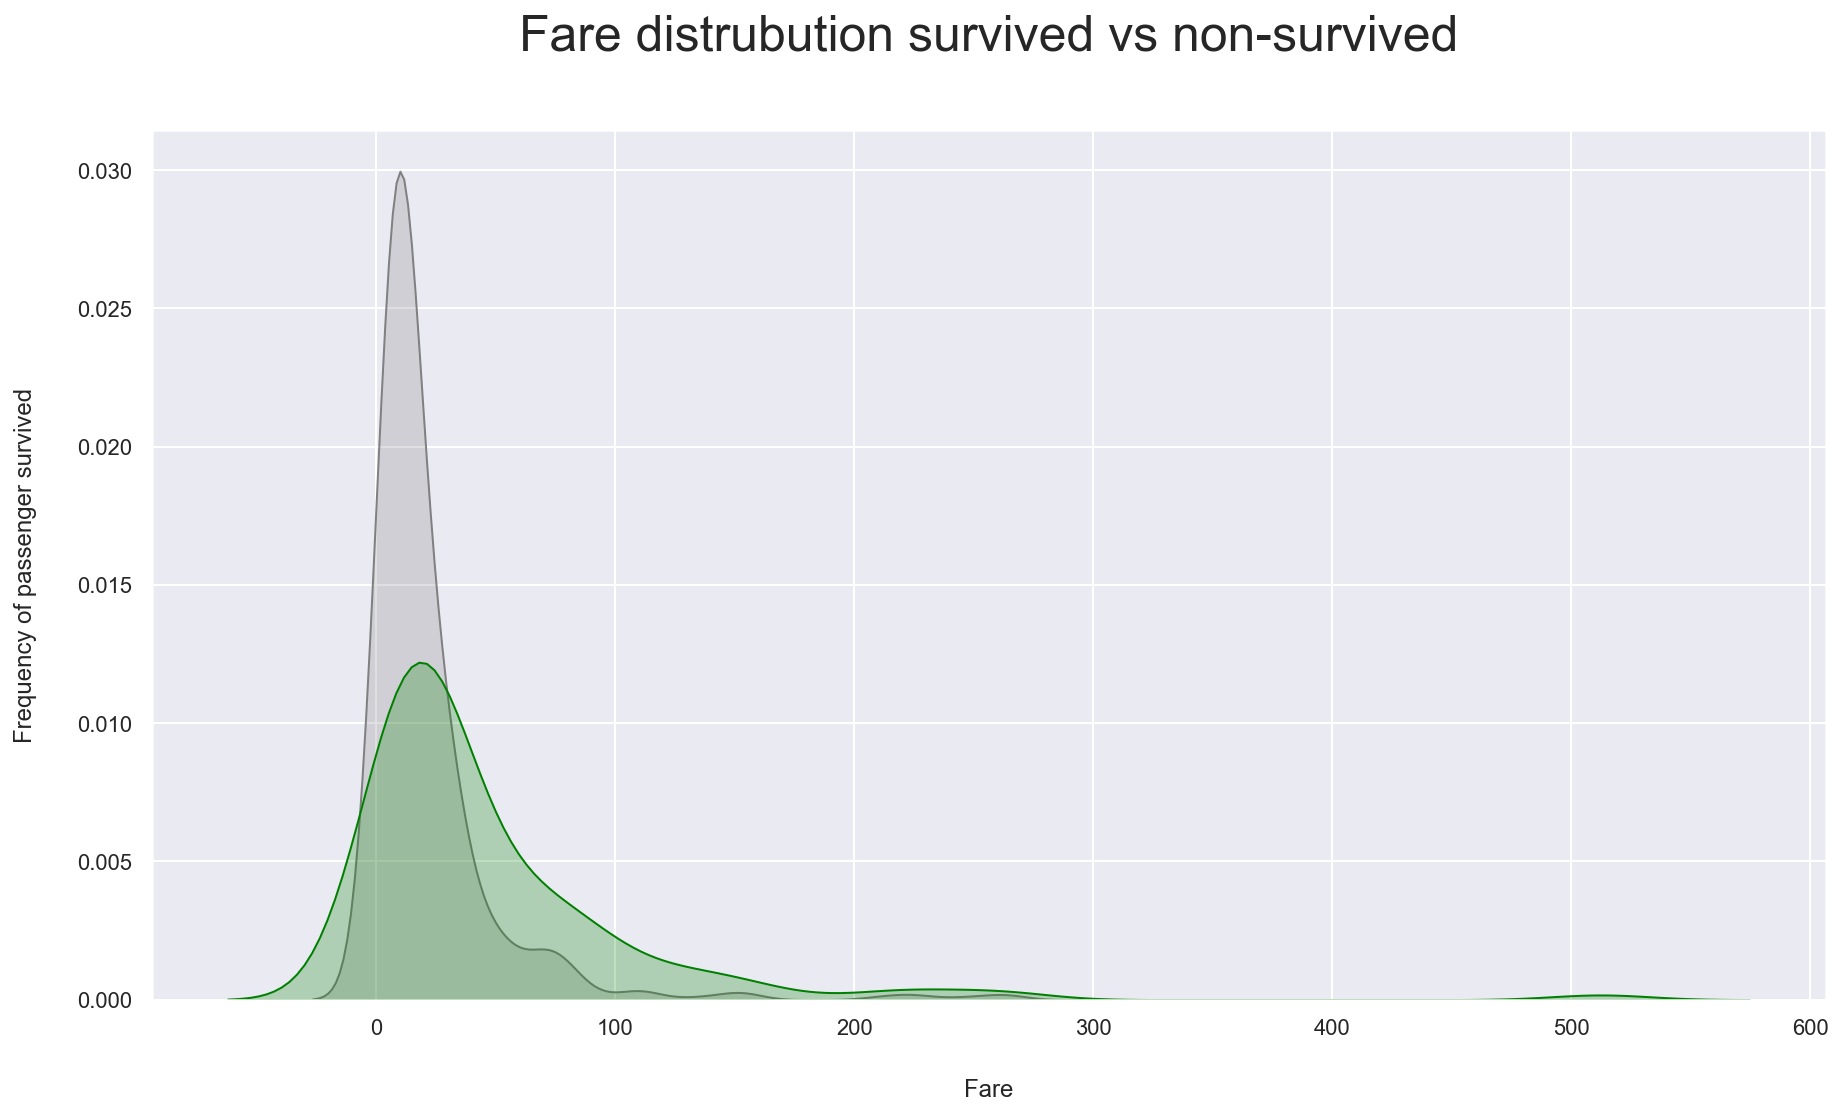

In [603]:
###     Fare and survived #######
fig=plt.figure(figsize=(15,8))
ax = sns.kdeplot(train.loc[(train['Survived']==0),'Fare'], 
                    color = 'Gray',
                    shade = True,
                    label = 'not survived'
                )

ax = sns.kdeplot(train.loc[(train['Survived']==1), 'Fare'],
                color = 'Green',
                shade = True,
                label = 'survived'
                )

plt.title('Fare distrubution survived vs non-survived',fontsize=25, pad=40)
plt.ylabel('Frequency of passenger survived',fontsize=12, labelpad=20)
plt.xlabel('Fare',fontsize=12, labelpad=20)


Text(0.5, 0, 'Age')

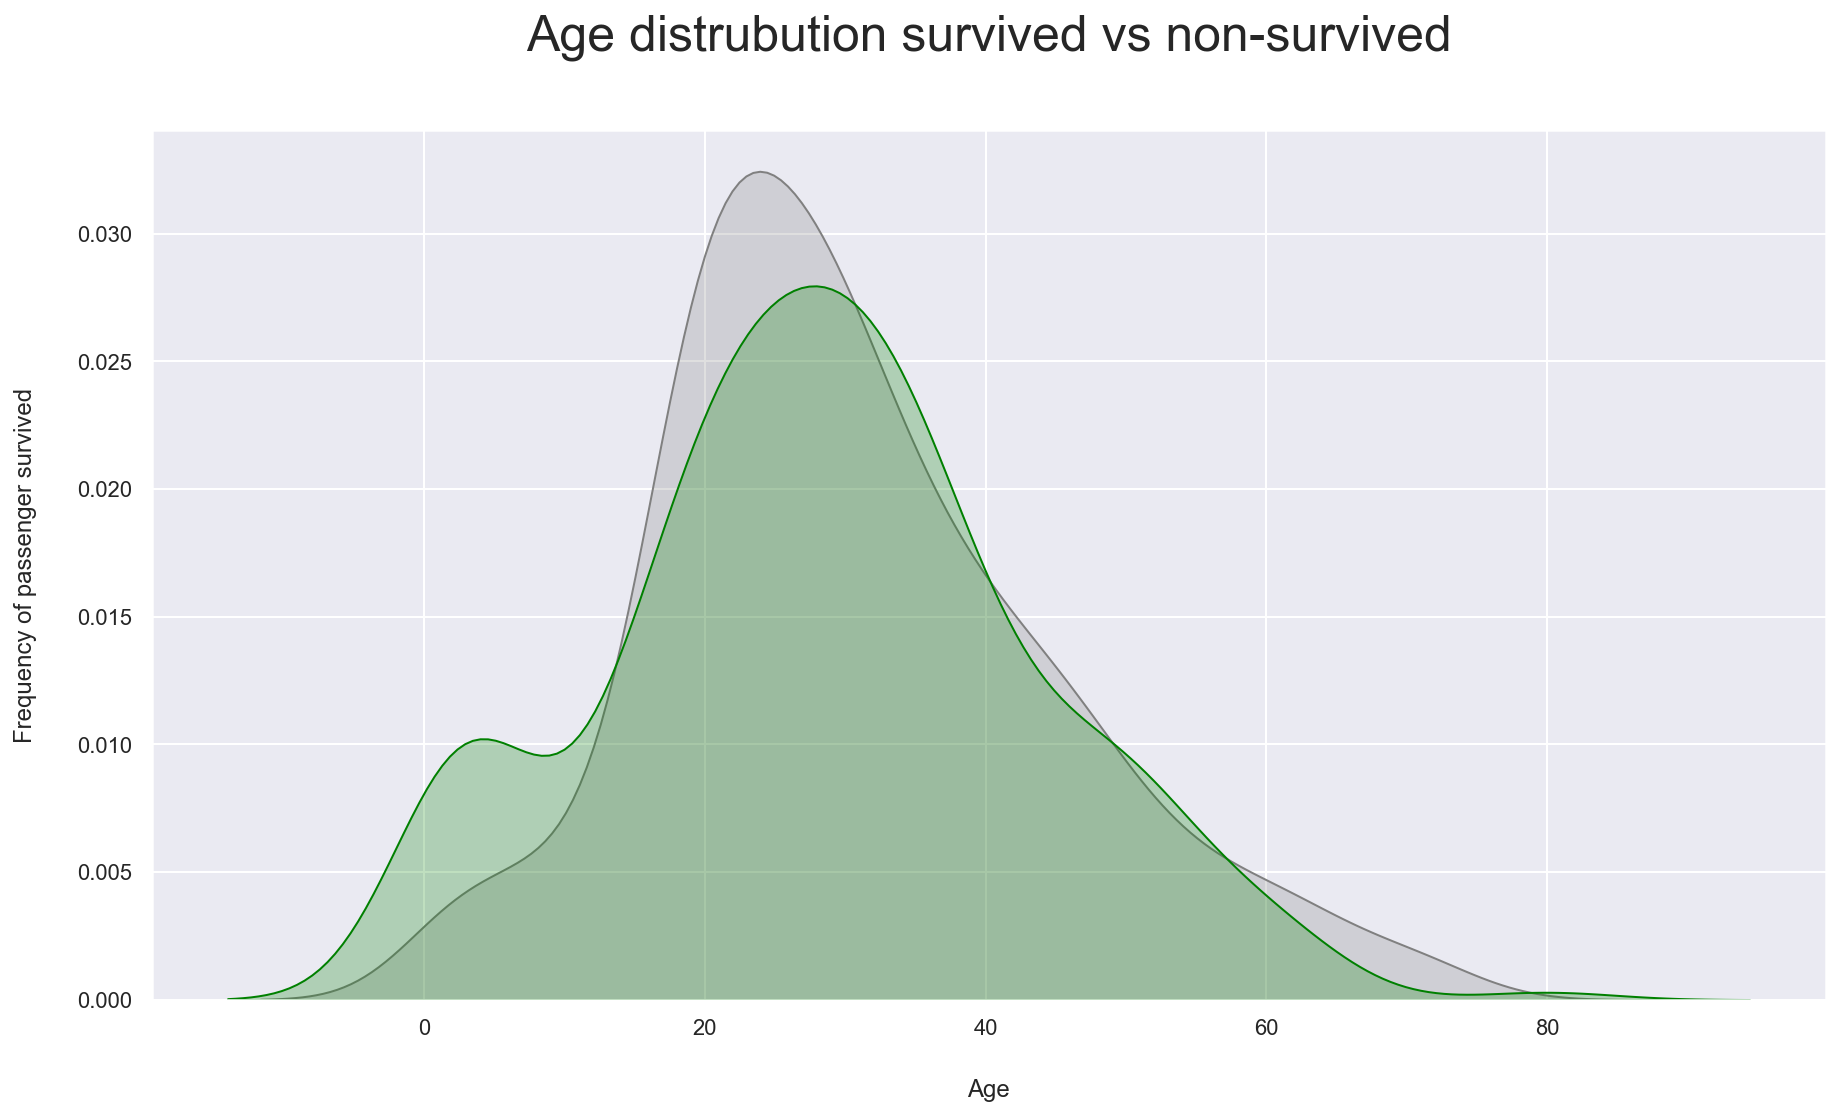

In [604]:
###     AGE and survived #######
fig=plt.figure(figsize=(15,8))
ax = sns.kdeplot(train.loc[(train['Survived']==0),'Age'], 
                    color = 'Gray',
                    shade = True,
                    label = 'not survived'
                )

ax = sns.kdeplot(train.loc[(train['Survived']==1), 'Age'],
                color = 'Green',
                shade = True,
                label = 'survived'
                )

plt.title('Age distrubution survived vs non-survived',fontsize=25, pad=40)
plt.ylabel('Frequency of passenger survived',fontsize=12, labelpad=20);
plt.xlabel('Age',fontsize=12, labelpad=20)


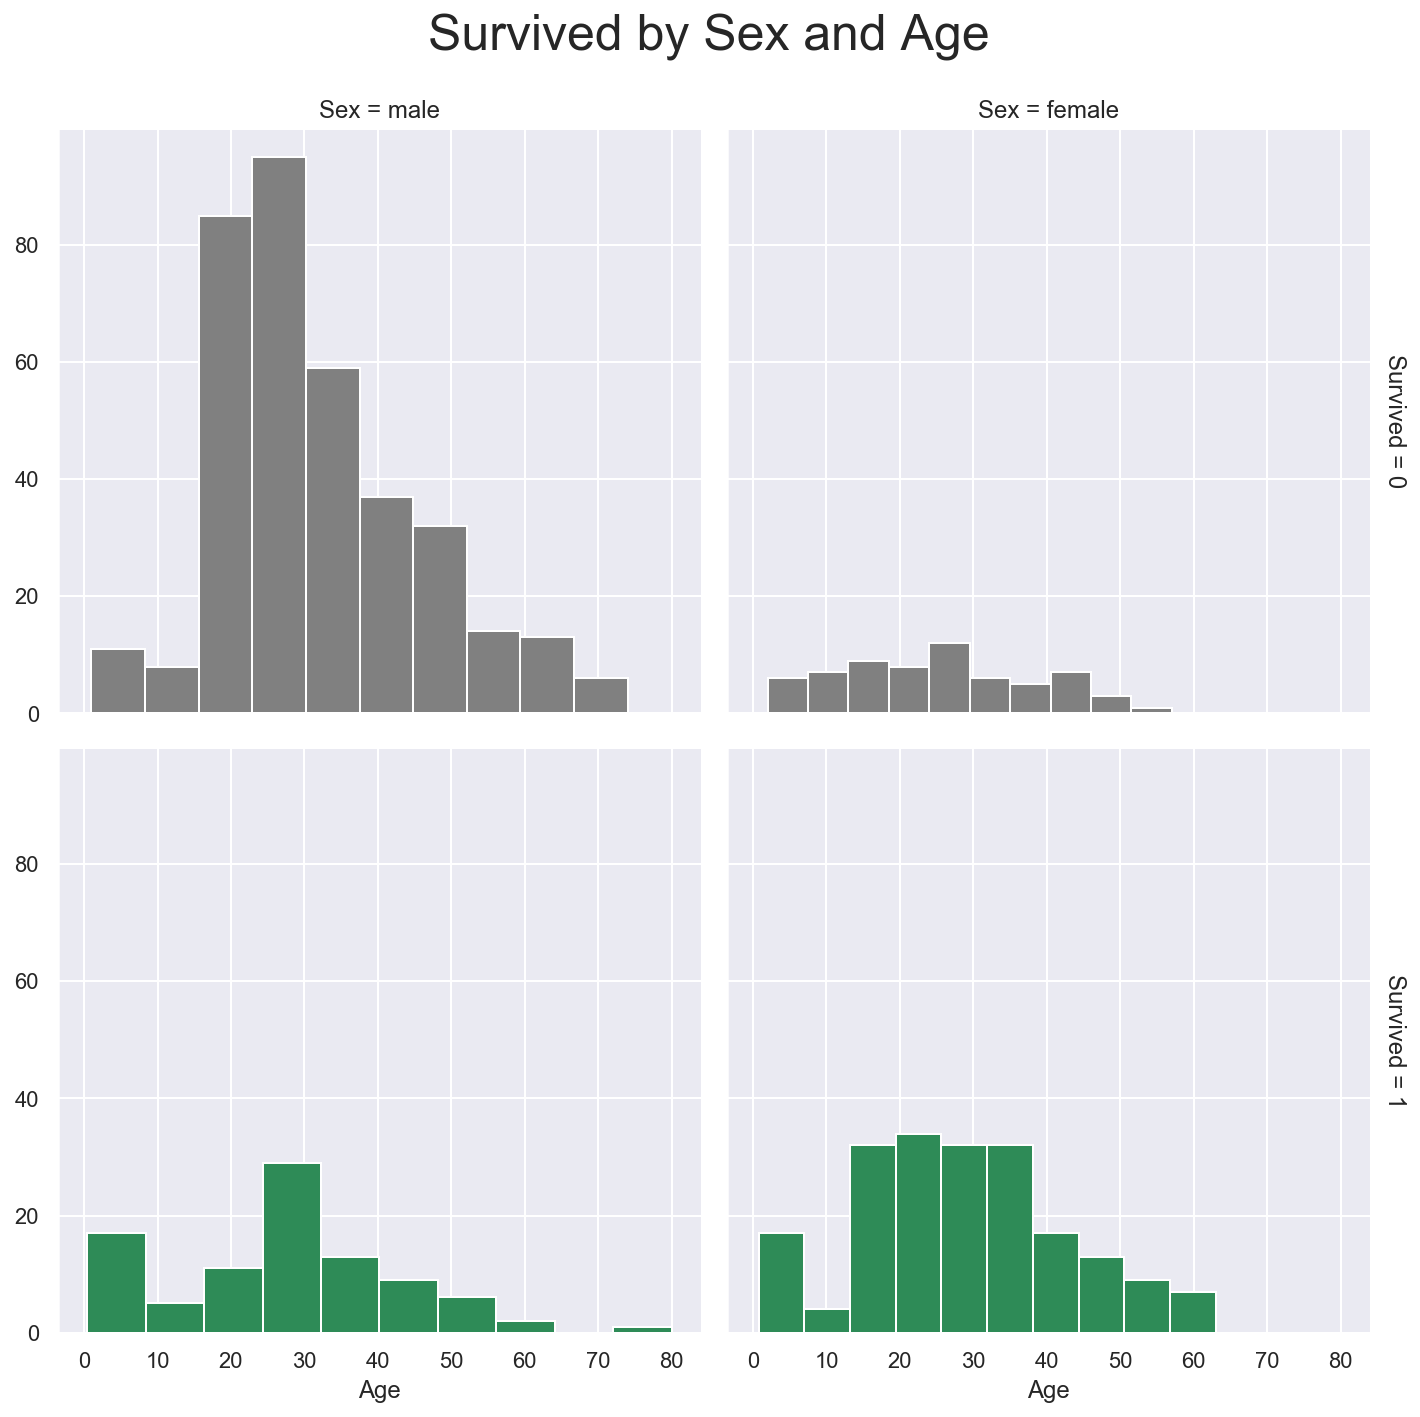

In [605]:
#visualize survived by age and sex (combined feature relation)

pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train,size=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

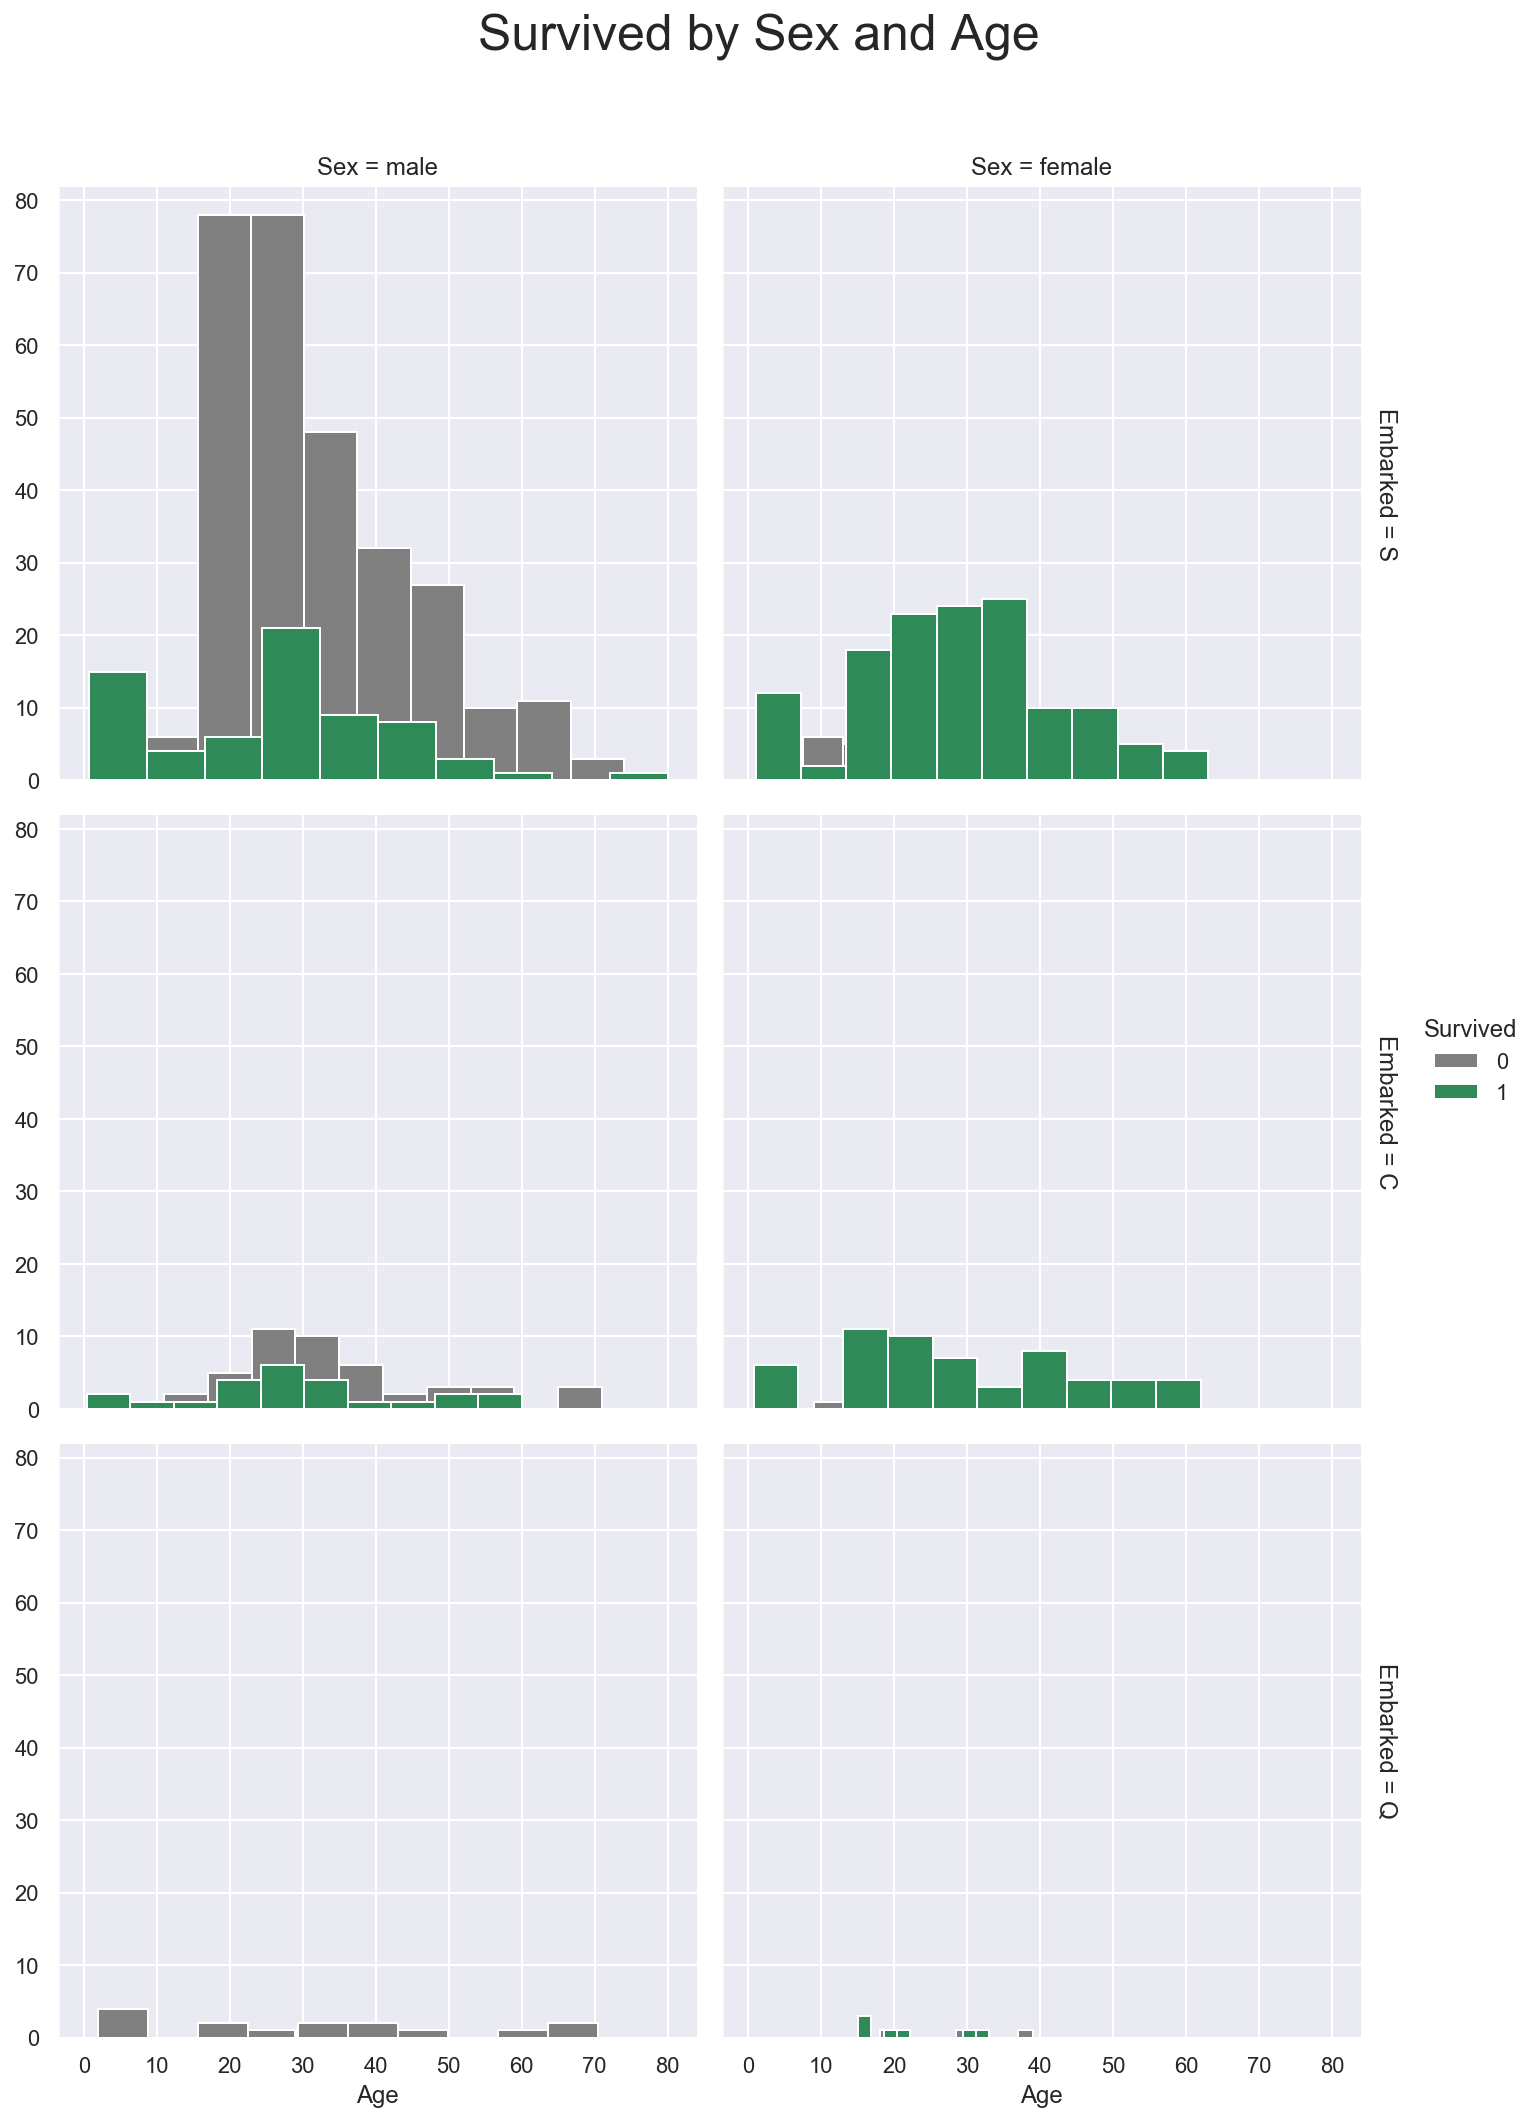

In [606]:
#visualize survived by embarked, age and sex

g = sns.FacetGrid(train,size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)


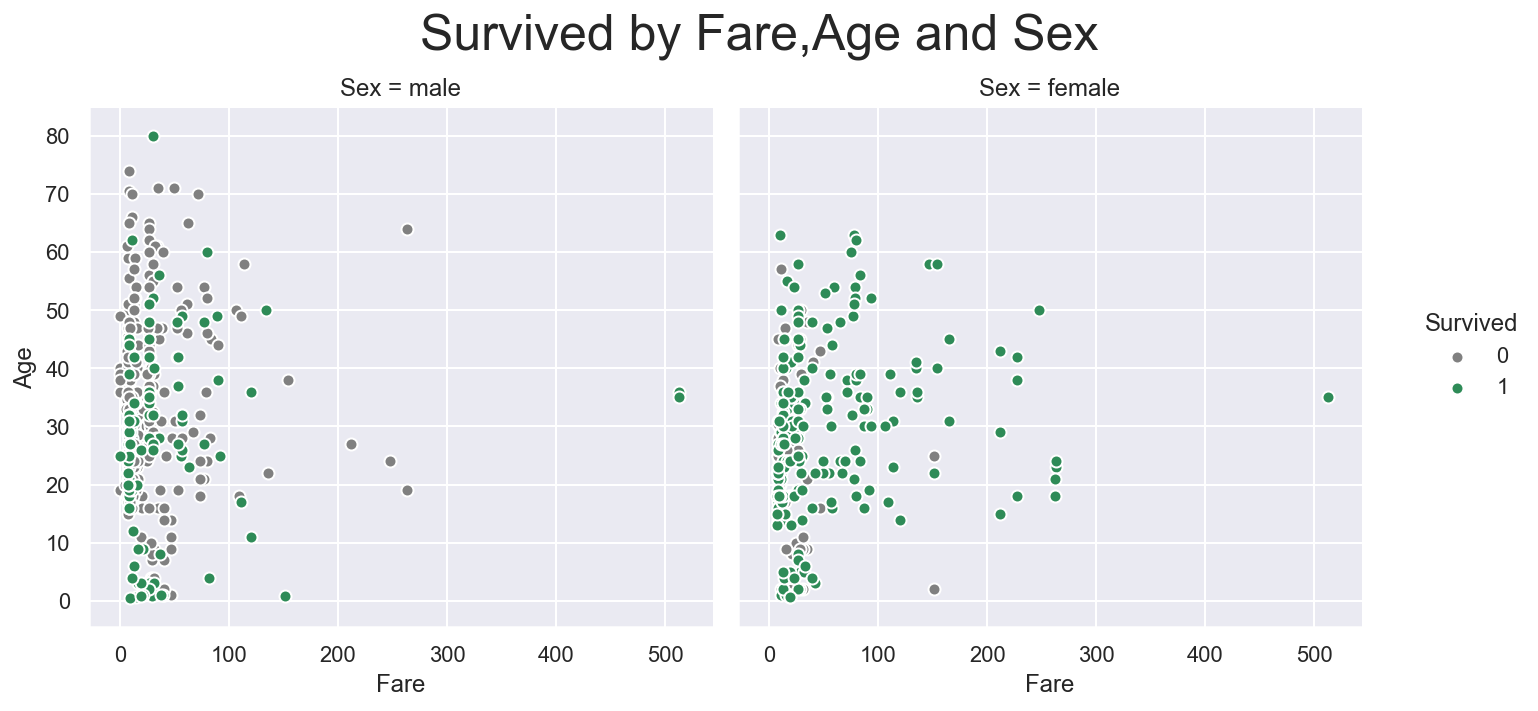

In [607]:
# survived by fare, age and sex

g = sns.FacetGrid(train, size=5,hue="Survived", col ="Sex", margin_titles=True,
                    palette=pal)
g.map(plt.scatter, "Fare", "Age", edgecolor="w").add_legend()
g.fig.suptitle("Survived by Fare,Age and Sex", size=25)
plt.subplots_adjust(top=0.85)


In [608]:
train[train.Fare > 280]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B,C,1
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C,1
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C,1


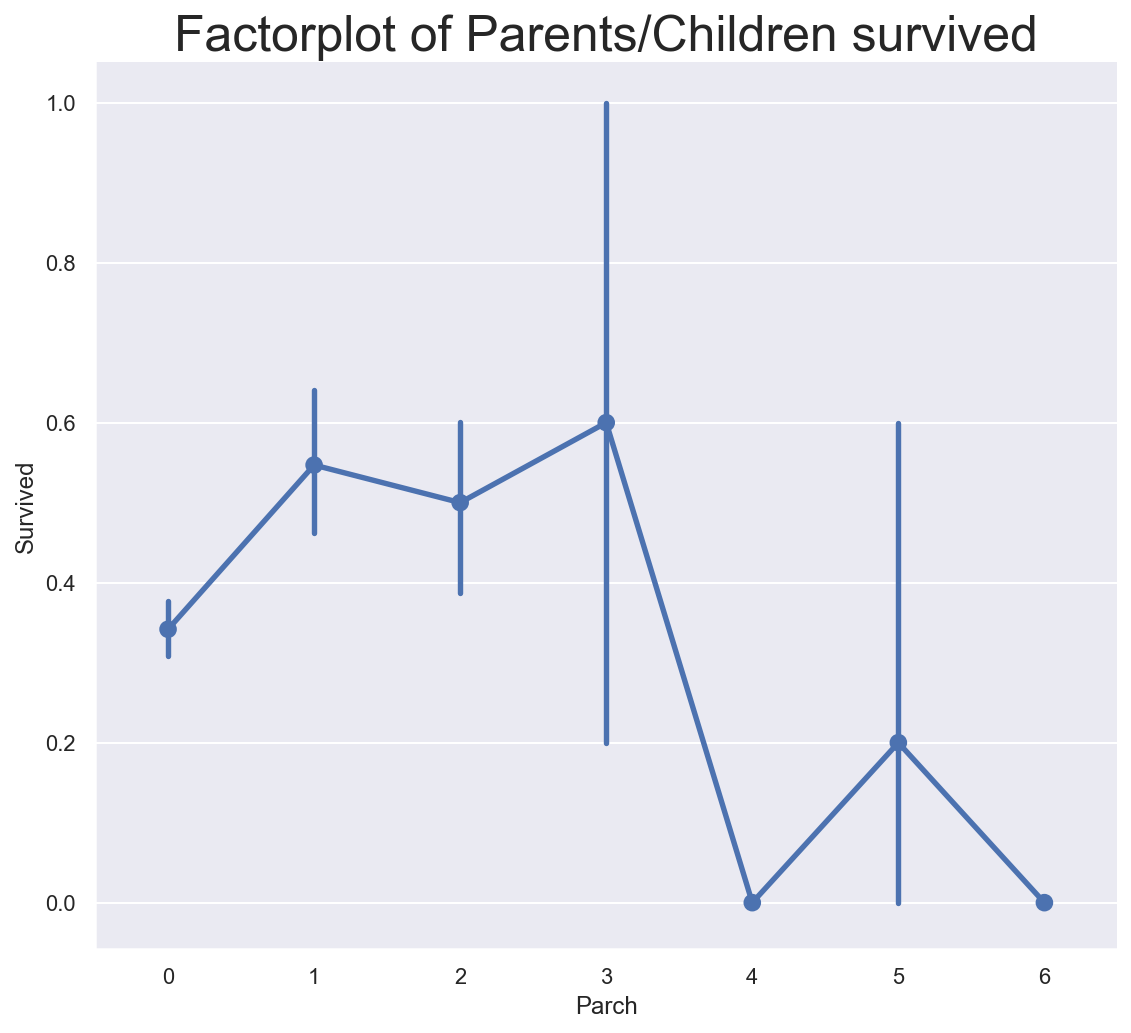

In [609]:
## dropping the three outliers where Fare is over $500 
train = train[train.Fare < 500]
## factor plot of parent child survived
sns.factorplot(x = "Parch", y = "Survived", data = train,kind = "point",size = 8)
plt.title("Factorplot of Parents/Children survived", fontsize = 25)
plt.subplots_adjust(top=0.85)

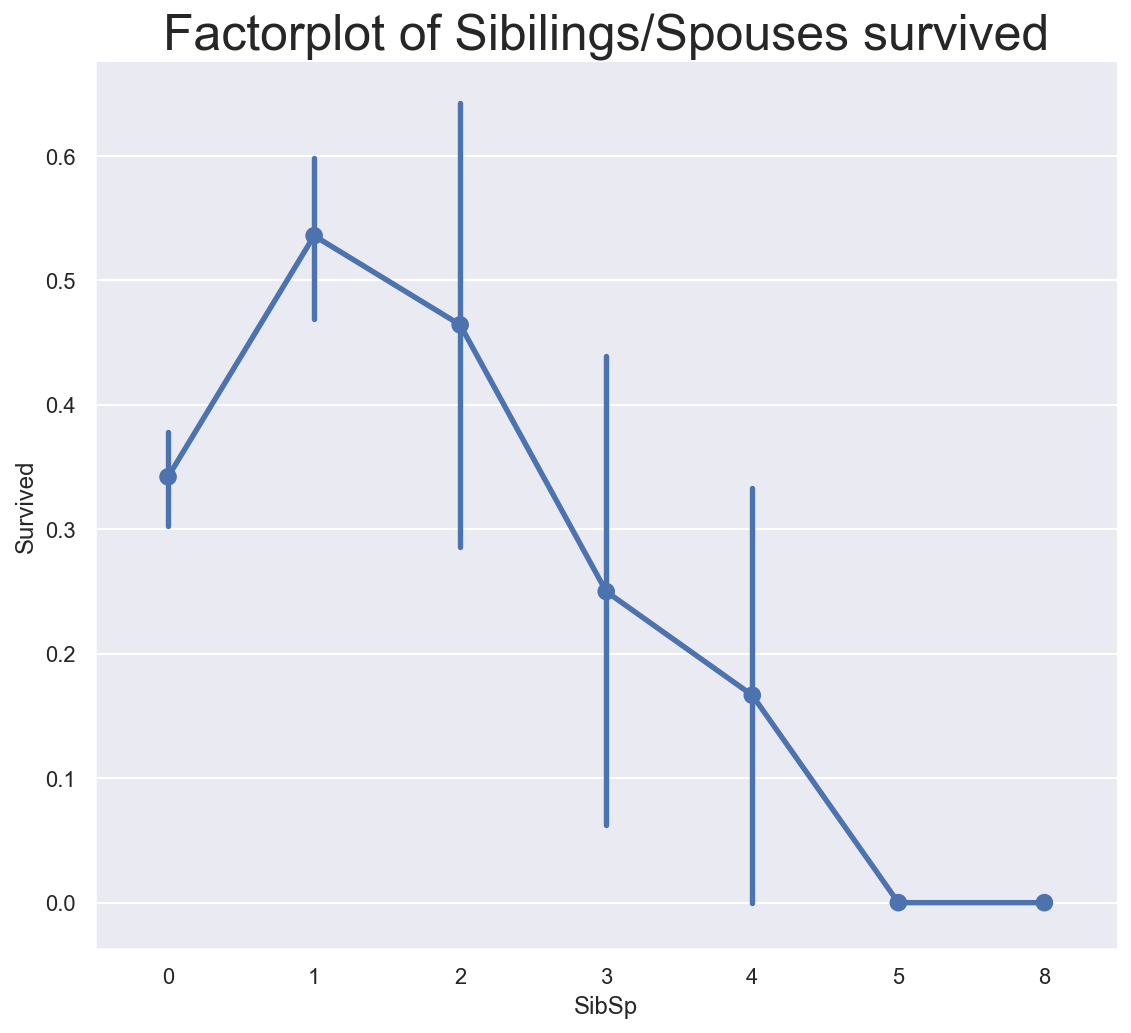

In [610]:
sns.factorplot(x =  "SibSp", y = "Survived", data = train,kind = "point",size = 8)
plt.title('Factorplot of Sibilings/Spouses survived', fontsize = 25)
plt.subplots_adjust(top=0.85)

In [611]:
#placing 0 for female and 1 for male
train['Sex'] = train.Sex.apply(lambda x:0 if x == "female" else 1)
test['Sex'] = test.Sex.apply(lambda x:0 if x == "female" else 1)

In [612]:
train.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,888.000000,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,2.313063,0.647523,29.675345,0.524775,0.381757,30.582164,0.381757
std,257.405474,0.834007,0.478011,14.552495,1.104186,0.806949,41.176366,0.486091
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800,0.000000
50%,445.500000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,667.250000,3.000000,1.000000,38.000000,1.000000,0.000000,30.771850,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000,1.000000


In [613]:
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.636364,30.272590,0.447368,0.392344,35.572384
std,120.810458,0.841838,0.481622,14.181209,0.896760,0.981429,55.851741
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,1.000000,39.000000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


In [614]:
train.describe(include=['object'])

,Name,Ticket,Cabin,Embarked
count,888,888,888,888
unique,888,680,8,3
top,"Braund, Mr. Owen Harris",347082,G,S
freq,1,7,464,644


In [615]:
#overview survived vs non-survived
survived_summary = train.groupby("Survived")
survived_summary.mean().reset_index()

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,447.016393,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1,443.353982,1.958702,0.315634,28.270627,0.477876,0.466077,44.289799


In [616]:
survived_summary = train.groupby("Sex")
survived_summary.mean().reset_index()

,Sex,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,0,431.578275,2.162939,27.888462,0.696486,0.651757,42.985091,0.741214
1,1,453.260870,2.394783,30.705477,0.431304,0.234783,23.830658,0.186087


In [617]:
survived_summary = train.groupby("Pclass")
survived_summary.mean().reset_index()

,Pclass,PassengerId,Sex,Age,SibSp,Parch,Fare,Survived
0,1,460.225352,0.563380,38.280984,0.422535,0.356808,78.124061,0.624413
1,2,445.956522,0.586957,29.877630,0.402174,0.380435,20.662183,0.472826
2,3,439.154786,0.706721,25.140620,0.615071,0.393075,13.675550,0.242363


In [618]:
pd.DataFrame(abs(train.corr()["Survived"]).sort_values(ascending = False))

,Survived
Survived,1.000000
Sex,0.545899
Pclass,0.334068
Fare,0.261742
Parch,0.082157
Age,0.079472
SibSp,0.033395
PassengerId,0.006916


In [619]:
#get the most important variable
corr = train.corr()**2
corr.Survived.sort_values(ascending = False)
np.shape(train.corr())

(8, 8)

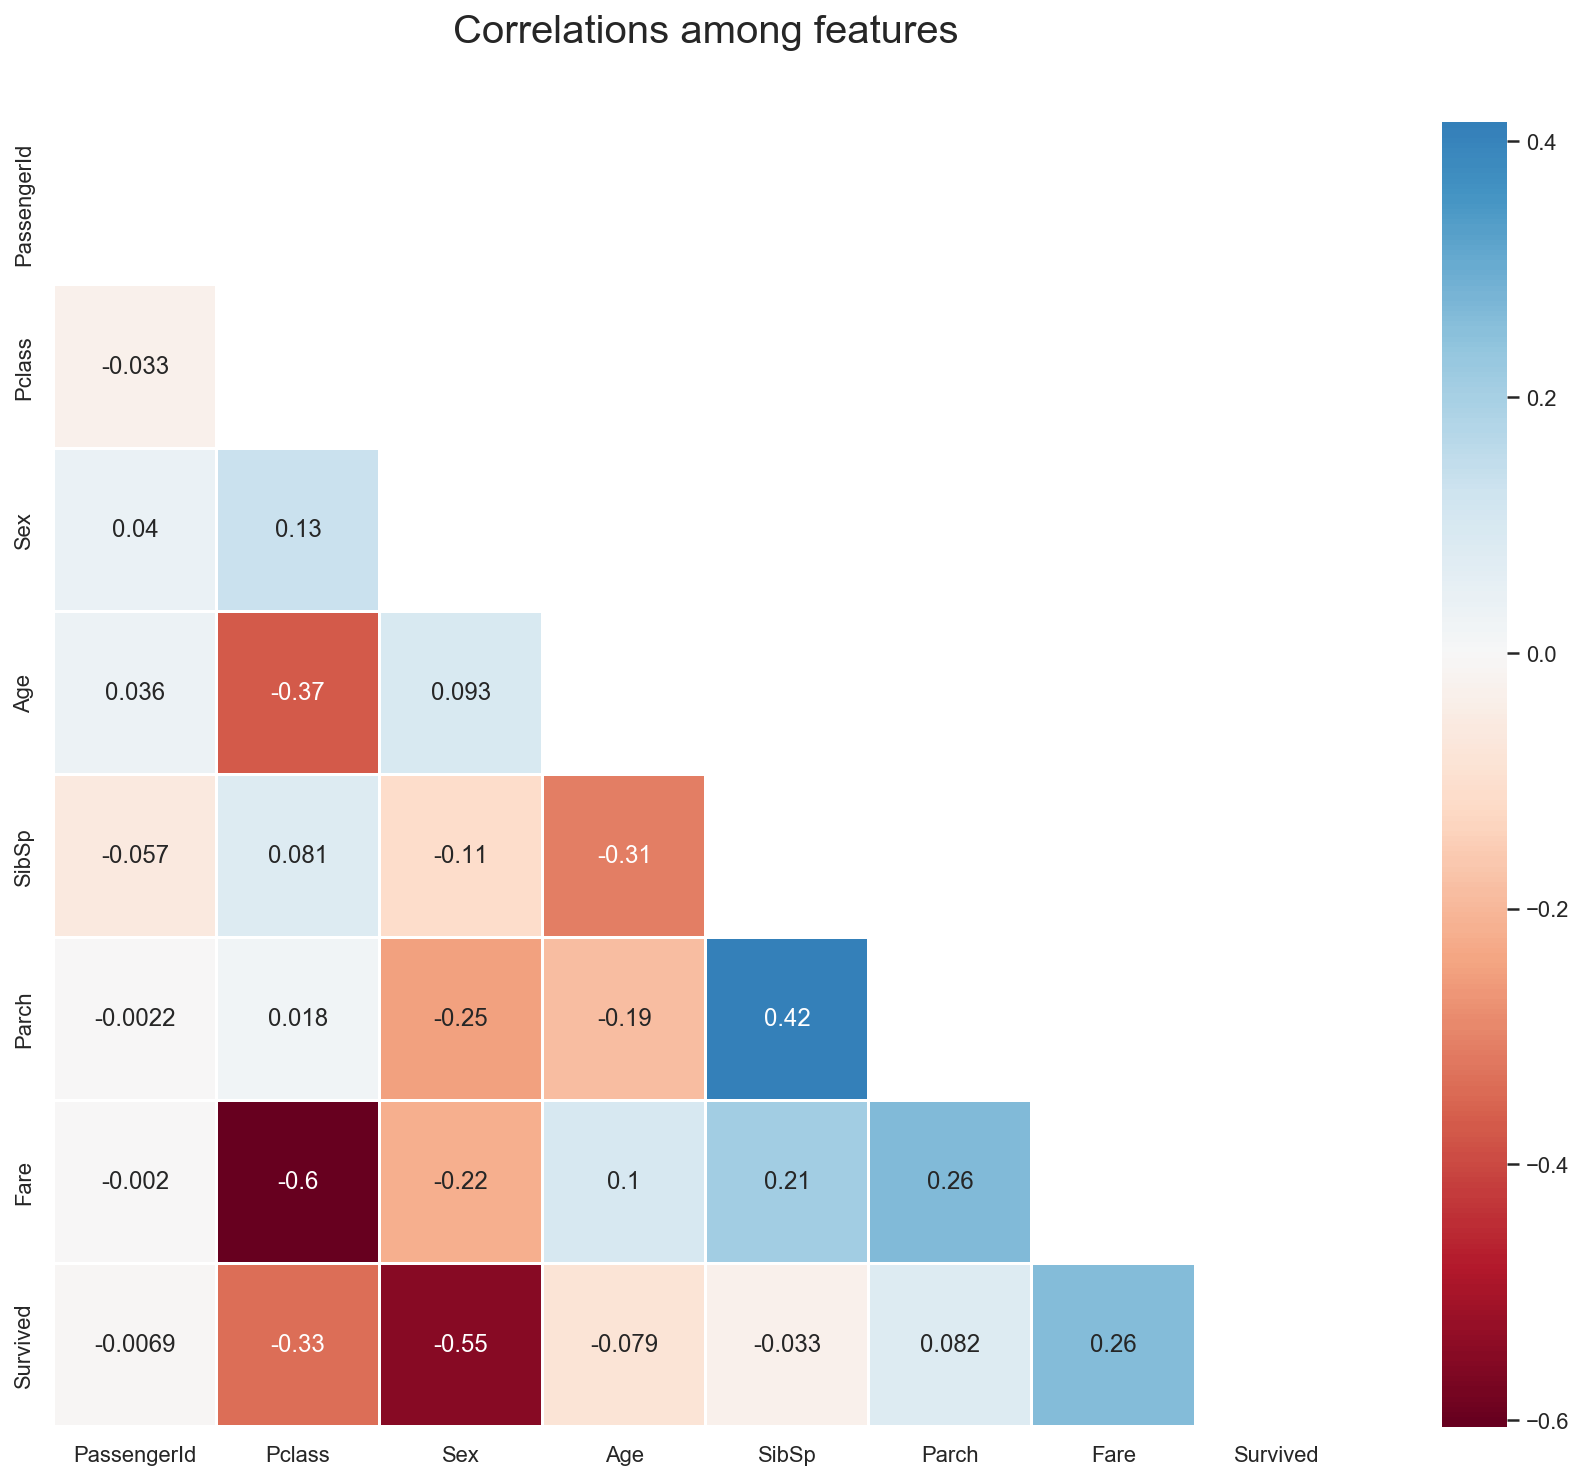

In [620]:
#heatmap to generate correlation between features
#generate a mask for upper triangle
import numpy as np
mask = np.zeros_like(train.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize=(15,12))
sns.heatmap(train.corr(),
            annot = True,
            mask = mask,
            cmap = 'RdBu',
            linewidth = 0.9,
            linecolor = 'white',
            fmt='.2g',
            center = 0,
            square = True           
           )
plt.title("Correlations among features", y=1.03, fontsize=20, pad=40);

In [621]:
male_mean = train[train["Sex"]==1].Survived.mean()
female_mean = train[train["Sex"]==0].Survived.mean()

print("Male survival mean " +str(male_mean))
print("Female survival mean " +str(female_mean))
print("The difference between mean survival " +str(female_mean-male_mean))

Male survival mean 0.18608695652173912
Female survival mean 0.7412140575079872
The difference between mean survival 0.5551271009862481


In [622]:
#separating male and feamle dataframe
import random
male = train[train["Sex"] == 1]
female = train[train["Sex"] == 0]

##empty list for storing mean sample
m_mean_samples = []
f_mean_samples = []

for i in range(50):
    m_mean_samples.append(np.mean(random.sample(list(male['Survived']),50)))
    f_mean_samples.append(np.mean(random.sample(list(female['Survived']),50)))
    
print("Male sample mean :" +str(round(np.mean(m_mean_samples),2)))
print("Female sample mean :" +str(round(np.mean(f_mean_samples),2)))


Male sample mean :0.19
Female sample mean :0.74


In [623]:
#Feature Engineering

#length of names
#creating a new feature name_length that will take count of each name's letters
train['name_length'] = [len(i) for i in train.Name]
test['name_length'] = [len(i) for i in test.Name]

def name_length_group(size):
    a = ''
    if (size<=20):
        a = 'short'
    elif (size<=35):
        a = 'medium'
    elif (size<=45):
        a = 'good'
    else:
        a = 'long'
    return a 

train['nLength_group'] = train['name_length'].map(name_length_group)
test['nLength_group'] = test['name_length'].map(name_length_group)

In [624]:
train.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,name_length,nLength_group
332,333,1,"Graham, Mr. George Edward",1,38.0,0,1,PC 17582,153.4625,C,S,0,25,medium
378,379,3,"Betros, Mr. Tannous",1,20.0,0,0,2648,4.0125,G,C,0,19,short
99,100,2,"Kantor, Mr. Sinai",1,34.0,1,0,244367,26.0000,F,S,0,17,short
355,356,3,"Vanden Steen, Mr. Leo Peter",1,28.0,0,0,345783,9.5000,G,S,0,27,medium
736,737,3,"Ford, Mrs. Edward (Margaret Ann Watson)",0,48.0,1,3,W./C. 6608,34.3750,T,S,0,39,good


In [625]:
#getting title from names
#title is after a ',' and a '.'
train["title"] = [i.split('.')[0] for i in train.Name]
train["title"] = [i.split(',')[1] for i in train.title]

test["title"] = [i.split('.')[0] for i in test.Name]
test["title"] = [i.split(',')[1] for i in test.title]

In [626]:
#lets check for white space
print(train.title.unique())
print(test.title.unique())

[' Mr' ' Mrs' ' Miss' ' Master' ' Don' ' Rev' ' Dr' ' Mme' ' Ms' ' Major'
 ' Lady' ' Sir' ' Mlle' ' Col' ' Capt' ' the Countess' ' Jonkheer']
[' Mr' ' Mrs' ' Miss' ' Master' ' Ms' ' Col' ' Rev' ' Dr' ' Dona']


In [627]:
#lets fix white space
train.title = train.title.apply(lambda x:x.strip( ))
test.title = test.title.apply(lambda x:x.strip( ))

In [628]:
train.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,name_length,nLength_group,title
136,137,1,"Newsom, Miss. Helen Monypeny",0,19.0,0,2,11752,26.2833,D,S,1,28,medium,Miss
508,509,3,"Olsen, Mr. Henry Margido",1,28.0,0,0,C 4001,22.5250,F,S,0,24,medium,Mr
438,439,1,"Fortune, Mr. Mark",1,64.0,1,4,19950,263.0000,C,S,0,17,short,Mr
61,62,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0000,B,C,1,19,short,Miss
53,54,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",0,29.0,1,0,2926,26.0000,F,S,1,50,long,Mrs


In [629]:
#replacing some rare titles with the word "rare" and some other titles with titles of our liking 
#train data

train["title"] = [i.replace('Ms','Miss') for i in train.title]
train["title"] = [i.replace('Mlle','Miss') for i in train.title] #mlle is mademoiselle 
train["title"] = [i.replace('Mme','Mrs') for i in train.title] #mme is madame

#next are all rare so lets just write a function

def name_converted(feature):
    """
    this feature helps convert titles
    """
    
    result = ''
    if feature in ['the Countess', 'Jonkheer', 'Capt', 'Dona', 'Col', 'Lady', 'Sir', 'Major', 'Rev', 'Don', 'Dr']:
        result = 'rare'
    elif feature in ['Ms', 'Mlle']:
        result = 'Miss'
    elif feature in ['Mme']:
        result = 'Mrs'
    else:
        result = feature
    
    return result

train.title = train.title.map(name_converted)
test.title = test.title.map(name_converted)


In [630]:
print(train.title.unique())
print(test.title.unique())

['Mr' 'Mrs' 'Miss' 'Master' 'rare']
['Mr' 'Mrs' 'Miss' 'Master' 'rare']


In [631]:
'''
creating family size feature
'''

train['family_size'] = train.Parch + train.SibSp + 1 
test['family_size'] = test.Parch + test.SibSp + 1

print(train.family_size.unique())
print(test.family_size.unique())

[ 2  1  5  3  7  6  4  8 11]
[ 1  2  3  5  4  6  8  7 11]


In [632]:
#binning family size
def family_group(size):
    """
    This function groups families into loner small large based on family size 
    """
    
    a = ''
    if (size<=1):
        a = 'loner'
    elif (size<=4):
        a = 'small'
    else:
        a = 'large'
    
    return a       

In [634]:
#apply family_group to modify family_group feature
train['family_group'] = train.family_size.map(family_group) 
test['family_group'] = test.family_size.map(family_group)

In [554]:
train.sample(8)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,name_length,nLength_group,title,family_size,family_group
797,798,3,"Osman, Mrs. Mara",0,31.0,0,0,349244,8.6833,G,S,1,16,short,Mrs,1,loner
363,364,3,"Asim, Mr. Adola",1,35.0,0,0,SOTON/O.Q. 3101310,7.0500,G,S,0,15,short,Mr,1,loner
750,751,2,"Wells, Miss. Joan",0,4.0,1,1,29103,23.0000,F,S,1,17,short,Miss,3,small
799,800,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",0,30.0,1,1,345773,24.1500,F,S,0,52,long,Mrs,3,small
340,341,2,"Navratil, Master. Edmond Roger",1,2.0,1,1,230080,26.0000,F,S,1,30,medium,Master,3,small
276,277,3,"Lindblom, Miss. Augusta Charlotta",0,45.0,0,0,347073,7.7500,G,S,0,33,medium,Miss,1,loner
809,810,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",0,33.0,1,0,113806,53.1000,E,S,1,46,long,Mrs,2,small
596,597,2,"Leitch, Miss. Jessie Wills",0,NaN,0,0,248727,33.0000,T,S,1,26,medium,Miss,1,loner


In [635]:
"""
new feature named is_alone
"""
train["is_alone"] = [1 if i<2 else 0 for i in train.family_size]
test["is_alone"] = [1 if i<2 else 0 for i in test.family_size]

In [556]:
test.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_length,nLength_group,title,family_size,family_group,is_alone
264,1156,2,"Portaluppi, Mr. Emilio Ilario Giuseppe",1,30.0,0,0,C.A. 34644,12.7375,G,C,38,good,Mr,1,loner,1
157,1049,3,"Lundin, Miss. Olga Elida",0,23.0,0,0,347469,7.8542,G,S,24,medium,Miss,1,loner,1
41,933,1,"Franklin, Mr. Thomas Parham",1,NaN,0,0,113778,26.5500,D,S,27,medium,Mr,1,loner,1


In [638]:
train.Ticket.value_counts().sample(10)

#i don't know how to engineer ticket feature for now

2694       1
112277     1
350034     1
17464      1
229236     1
3101295    6
347062     1
CA 2144    6
19947      1
PP 4348    1
Name: Ticket, dtype: int64

In [639]:
train.drop(["Ticket"], axis=1, inplace=True)
test.drop(["Ticket"], axis=1, inplace=True)

In [640]:
#calculating fare from family size
train["calculated_fare"] = train.Fare/train.family_size
test["calculated_fare"] = test.Fare/test.family_size


In [641]:
def fare_group(fare):
    '''
    this function creates a fare group based on the calculated fare
    '''
    
    a = ''
    if fare<=4:
        a = 'very_low'
    elif fare<=10:
        a = 'low'
    elif fare<=20:
        a = 'mid'
    elif fare<=45:
        a = 'high'
    else:
        a = 'very_high'
        
    return a

train['fare_group'] = train.calculated_fare.map(fare_group)
test['fare_group'] = test.calculated_fare.map(fare_group)
            

In [642]:
train.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,name_length,nLength_group,title,family_size,family_group,is_alone,calculated_fare,fare_group
167,168,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",0,45.0,1,4,27.90,T,S,0,47,long,Mrs,6,large,0,4.65,low
784,785,3,"Ali, Mr. William",1,25.0,0,0,7.05,G,S,0,16,short,Mr,1,loner,1,7.05,low
385,386,2,"Davies, Mr. Charles Henry",1,18.0,0,0,73.50,C,S,0,25,medium,Mr,1,loner,1,73.50,very_high
32,33,3,"Glynn, Miss. Mary Agatha",0,NaN,0,0,7.75,G,Q,1,24,medium,Miss,1,loner,1,7.75,low
546,547,2,"Beane, Mrs. Edward (Ethel Clarke)",0,19.0,1,0,26.00,F,S,1,33,medium,Mrs,2,small,0,13.00,mid


In [643]:
'''
dropping PassengerId
'''

train.drop(['PassengerId'], axis=1, inplace=True)
test.drop(['PassengerId'], axis=1, inplace=True)

In [644]:
#getting dummy vairables

train = pd.get_dummies(train, columns= ['title', 'Pclass', 'Embarked', 'Cabin', 'nLength_group', 'family_group', 'fare_group'])
test = pd.get_dummies(test, columns= ['title', 'Pclass', 'Embarked', 'Cabin', 'nLength_group', 'family_group', 'fare_group'])
train.drop(['Name', 'family_size', 'name_length', 'Fare'], axis=1, inplace=True)
test.drop(['Name', 'family_size', 'name_length', 'Fare'], axis=1, inplace=True)

In [645]:
train.sample(10)

,Sex,Age,SibSp,Parch,Survived,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,...,nLength_group_medium,nLength_group_short,family_group_large,family_group_loner,family_group_small,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high,fare_group_very_low
159,1,NaN,8,2,0,0,6.322727,1,0,0,...,1,0,1,0,0,0,1,0,0,0
564,0,NaN,0,0,0,1,8.050000,0,1,0,...,1,0,0,1,0,0,1,0,0,0
277,1,NaN,0,0,0,1,0.000000,0,0,1,...,1,0,0,1,0,0,0,0,0,1
107,1,NaN,0,0,1,1,7.775000,0,0,1,...,1,0,0,1,0,0,1,0,0,0
534,0,30.0,0,0,0,1,8.662500,0,1,0,...,0,1,0,1,0,0,1,0,0,0
484,1,25.0,1,0,1,0,45.539600,0,0,1,...,1,0,0,0,1,0,0,0,1,0
120,1,21.0,2,0,0,0,24.500000,0,0,1,...,1,0,0,0,1,1,0,0,0,0
367,0,NaN,0,0,1,1,7.229200,0,0,0,...,1,0,0,1,0,0,1,0,0,0
396,0,31.0,0,0,0,1,7.854200,0,1,0,...,0,1,0,1,0,0,1,0,0,0
710,0,24.0,0,0,1,1,49.504200,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [649]:
## rearranging the columns so that I can easily use the dataframe to predict the missing age values. 
train = pd.concat([train[["Survived", "Age", "Sex","SibSp","Parch"]], train.loc[:,"is_alone":]], axis=1)
test = pd.concat([test[["Age", "Sex"]], test.loc[:,"SibSp":]], axis=1)